In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

from glob import glob



In [2]:
df_business = pd.read_csv("yelp_business.csv")

In [3]:
df_review = pd.read_csv("yelp_review.csv")

In [4]:
df_business.drop("neighborhood", axis = 1, inplace =True)

In [5]:
df_business.dropna(inplace = True)

In [6]:
df_review.dropna(inplace = True)

In [7]:
temp_df=df_review.groupby("business_id")["review_id"].count().reset_index()


In [ ]:
temp_df=temp_df[temp_df['review_id']>70]
temp_df.set_index('business_id')


/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


([<matplotlib.axis.XTick at 0x1137ae9b0>,
 <a list of 10 Text xticklabel objects>)

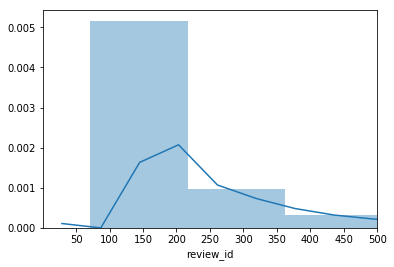

In [9]:
import seaborn as sns
%matplotlib inline
axes = sns.distplot(temp_df['review_id'])
axes.set_xlim([0,500])
plt.xticks([50,100,150,200,250,300,350,400,450,500])


In [10]:
df_review=df_review[df_review['business_id'].isin(temp_df['business_id'])]

In [11]:
df_business["categories"]=df_business["categories"].str.split(";")

In [12]:
df_new=df_business.copy()
df_new.shape

(173941, 12)

In [13]:
def is_restaurant(cat):
    return ('Restaurants' in cat)
      
df_business['is_restaurant']=df_business['categories'].apply(is_restaurant)
df_business=df_business[df_business['is_restaurant']]
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,is_restaurant
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ...",True
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""","""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,"[Italian, Restaurants]",True
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""","""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,"[Breakfast & Brunch, Gluten-Free, Coffee & Tea...",True
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""","""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,"[Restaurants, American (Traditional)]",True
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""","""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,"[Italian, French, Restaurants]",True


In [14]:
df_business.drop('is_restaurant',axis=1,inplace=True)
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,"[American (New), Nightlife, Bars, Sandwiches, ..."
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""","""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,"[Italian, Restaurants]"
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""","""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,"[Breakfast & Brunch, Gluten-Free, Coffee & Tea..."
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""","""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,"[Restaurants, American (Traditional)]"
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""","""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,"[Italian, French, Restaurants]"


In [15]:
merged_df = pd.merge(df_business, df_review, left_on = ["business_id", "stars"], right_on = ["business_id", "stars"], how = "inner")

/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:962: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


In [16]:
merged_df["review_score"] = merged_df["review_count"] * merged_df["stars"]
merged_df.tail()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,review_id,user_id,date,text,useful,funny,cool,review_score
369170,UdEmYOnk2iJDY9lpEPAlJQ,"""Floridino's Pizza & Pasta""","""590 N Alma School Rd, Ste 35""",Chandler,AZ,85224,33.311383,-111.859604,4.0,374,1,"[Pizza, Event Planning & Services, Italian, Ca...",0640GotvbijiO3j4cDGpsw,IkBW-XFpcH4A-fdsOtEaPw,2011-09-14,As everyone else said the calzones are great! ...,0,0,0,1496.0
369171,UdEmYOnk2iJDY9lpEPAlJQ,"""Floridino's Pizza & Pasta""","""590 N Alma School Rd, Ste 35""",Chandler,AZ,85224,33.311383,-111.859604,4.0,374,1,"[Pizza, Event Planning & Services, Italian, Ca...",ejMbuqHuMBdD4yMByNdiMQ,7KwVQBCAYd4c_pt8OX0ENw,2017-02-25,"This is a great little spot. Great food, good ...",0,0,0,1496.0
369172,UdEmYOnk2iJDY9lpEPAlJQ,"""Floridino's Pizza & Pasta""","""590 N Alma School Rd, Ste 35""",Chandler,AZ,85224,33.311383,-111.859604,4.0,374,1,"[Pizza, Event Planning & Services, Italian, Ca...",RhCRhZ1UmuyVdamBO3JuSg,4cHbhUrLXhlKStUpNzBL1A,2010-04-29,Giving it a 4 stars cuz I fell in love with th...,1,0,0,1496.0
369173,UdEmYOnk2iJDY9lpEPAlJQ,"""Floridino's Pizza & Pasta""","""590 N Alma School Rd, Ste 35""",Chandler,AZ,85224,33.311383,-111.859604,4.0,374,1,"[Pizza, Event Planning & Services, Italian, Ca...",YS4E-ekL0_JT0V392p6H0g,Y90VLAll1ORwSnjhRZQZqA,2015-03-10,"I was in the mood for some pizza, so I yelped ...",1,0,0,1496.0
369174,UdEmYOnk2iJDY9lpEPAlJQ,"""Floridino's Pizza & Pasta""","""590 N Alma School Rd, Ste 35""",Chandler,AZ,85224,33.311383,-111.859604,4.0,374,1,"[Pizza, Event Planning & Services, Italian, Ca...",PBYWdiC_sXXUjwjc3NIoRw,Lb3uHVblNTHXHf2bxxwWbw,2011-10-17,What's OK: I don't go to places like this for...,1,0,1,1496.0


In [17]:
def has_offers(review):
    to_search=['offers','discount','deals']
    for word in to_search:
        if(word in review):
            return True
    return False

merged_df['OFFERS-DISCOUNTS']=merged_df['text'].apply(has_offers)
merged_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,categories,review_id,user_id,date,text,useful,funny,cool,review_score,OFFERS-DISCOUNTS
0,1WBkAuQg81kokZIPMpn9Zg,"""Charr An American Burger Bar""","""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,33.60731,-112.063404,3.0,232,...,"[Burgers, Restaurants]",StgTyJ_Bnw6cyeP9DpnsnQ,jCXvS-quFAuTZ3Er13UFSw,2017-09-03,"Wonderful burgers, excellent onion rings, goo...",1,0,0,696.0,False
1,1WBkAuQg81kokZIPMpn9Zg,"""Charr An American Burger Bar""","""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,33.60731,-112.063404,3.0,232,...,"[Burgers, Restaurants]",QBusNu7rbXrR71gYBiafwA,uiMEzFP4KnlKQrsb_3HzlQ,2012-09-12,Good Burger but on the pricy side for what you...,0,0,0,696.0,False
2,1WBkAuQg81kokZIPMpn9Zg,"""Charr An American Burger Bar""","""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,33.60731,-112.063404,3.0,232,...,"[Burgers, Restaurants]",L4QNAo0eXnHS9JEveYdZJA,Dok_7tji5ImFr8BUMha4nQ,2013-09-26,Visited for Restaurant Week so we had a shared...,0,0,0,696.0,False
3,1WBkAuQg81kokZIPMpn9Zg,"""Charr An American Burger Bar""","""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,33.60731,-112.063404,3.0,232,...,"[Burgers, Restaurants]",NW7dt_I3YH2TN1Pxm59B1g,5aheyAtMObm5SUaeBpxZ6g,2015-05-19,Was here on a business lunch with a colleague....,1,0,0,696.0,False
4,1WBkAuQg81kokZIPMpn9Zg,"""Charr An American Burger Bar""","""777 E Thunderbird Rd, Ste 107""",Phoenix,AZ,85022,33.60731,-112.063404,3.0,232,...,"[Burgers, Restaurants]",zSRQvImykxqI4oygnkdgkA,fIxWWXpzRXt796UNs5DDEQ,2014-01-06,This was the second time I have come to charr....,4,1,0,696.0,False


In [18]:
def is_date_spot(review):
    to_search=['romantic','couple','date','sex','tinder']
    for word in to_search:
        if(word in review):
            return True
    return False

merged_df['DATE SPOT']=merged_df['text'].apply(is_date_spot)


In [19]:
def is_sports(review):
    to_search=['sports','baseball','rugby','game','football']
    for word in to_search:
        if(word in review):
            return True
    return False

merged_df['SPORTS BAR']=merged_df['text'].apply(is_sports)


In [20]:
def is_waffle(review):
    to_search=['waffle']
    for word in to_search:
        if(word in review):
            return True
    return False

merged_df['WAFFLES']=merged_df['text'].apply(is_waffle)
merged_df[merged_df['WAFFLES']==True].shape

(5898, 24)

In [ ]:
merged_df.to_csv("final_data.csv", index=False)

In [ ]:
midterm_df = merged_df.head(50)
midterm_df.to_csv("final_data.csv", index=False)

In [ ]:
merged_df.columns


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.grid_search import GridSearchCV

/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajvardhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# CLASSIFYING FOR ROMANTIC 
import string 

X_romantic=merged_df['text'][:1000]
y_romantic=merged_df['DATE SPOT'][:1000]

def bool_to_int(bool_val):
    if(bool_val): 
        return 1
    return 0

for each in y_romantic:
    each=bool_to_int(each)

def text_process(text):
    
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


for each in X_romantic:
    each=text_process(each)

vocab = CountVectorizer(analyzer=text_process).fit(X_romantic)
X_romantic = vocab.transform(X_romantic)



-------------------------------------------
Wonderful burgers,  excellent onion rings, good service.  Just don't order dessert.  We ordered apple cobbler and was served blueberry bread pudding.  When we questioned if it was apple cobbler our waited assured us it was cobbler. After we ate a few bites... no apple! The waitress told us she has been waiting for a customer to question it.  We still were charged the full $7.00 for a dessert we didn't order or want! Too bad the rest of the meal was great!
-------------------------------------------
Good Burger but on the pricy side for what you get. I work nearby and was hoping for a lunch deal but they aren't open for lunch. Pleasant staff and service was good but no lunch no return trips.
-------------------------------------------
Visited for Restaurant Week so we had a shared app (crab cake), two entrees (Carolina burger w\/string fries and fish and "chips"\/string fries) and shared dessert. The waiter was friendly but somewhat unattentiv

-------------------------------------------
Nicholas my subordinate from work suggested that we should try this place because it looked cool.  So we jump into the car and drove a bazillion miles to get here. 

The place definitely looked cool in person and it was well kept and clean.  The loo was pretty decent as well for a burger joint.  The staff were super friendly and helpful because this was our first time eating here.  Service was good speed, and no mistakes were made. 

To the food, Nicholas order their signature burger, and we split their mac and cheese... which was absolutely amazing! It's definitely not the best I had, but close enough.. and I highly recommend it.  I also order some wings which was okay, they were really tough to chew. 

Overall a good place.  Probably won't come back again since it's so very far.
-------------------------------------------
Not so much a review, but a chance to vent about about the negative experience we just had at Charr. The hamburgers are 

-------------------------------------------
Ate there last night. Place should be great with nice surroundings, quality ingredients, and diverse menu. Restaurant failed at the two key places. A brand new server who was slow and inefficient was irritating, but the real sin was over cooking the burgers. 4 people at the table ordered medium and 1 was served medium and 3 well done.  I assume the beef was as high quality as everything else, but I had no way to tell with meat that over cooked.
-------------------------------------------
Much-needed upscale place in Moon Valley.  Cheated on my standard, Ammacapanne's, 3 times to try this place.  Much better fare, but much worse service.  This most recent visit, the hostess seated us and I asked for a reminder on what the WiFi password was (I'm not a total douche...my wife and I run a small biz together and commonly work over meals and drinks).  The hostess kinda curtly said she didn't know if the place even has WiFi (I knew it did) and didn't

-------------------------------------------
Pretty cool spot for a night out with friends or a day with the family. There are tons of games, bowling, food and drinks (for the adults ). We have been here a few times and each time of course the kids left very happy (and tired, thankfully). They have games for tickets which can be traded in for prizes in the end as well as a room full of computer\/video games. Games for everyone! 

They have a few pretty good deals for games only but the one we took advantage of was the unlimited play for an hour with an entree. 

There was some miscommunication between how to purchase the deal and we got sent around to 3 different people so that was a bit frustrating. Only other downfall was the service in the restaurant. We waited for almost 10 minutes before anyone came and greeted us or got our drinks, then another 30 minutes for our food. I'm not a master chef but I don't think our nachos, cheese pizza and burger takes that long to prepare. Also, our

-------------------------------------------
The place is cool, the games are great


 the food is disgusting

The customer service poor


It is hands-down the worst food I've never ordered. Salty bruschetta, salty disgusting calamari, nachos with nothing on them

I've never had worst food served to me on a consistent basis
-------------------------------------------
The first few games we tried had broken controls so we played more of the circus games that you can win tickets to redeem for little trinkets. Those brought back memories of going to the carnival when I was little. My teenage son  decided to go the gaming section which features online computer role playing. the price at 5 per hour seemed very reasonable.  Decided to have lunch at the restaurant. It is inside of Gameworks with open walls so you hear the machines and excitment of kids and adults. There are also multiple tv screens showing various sports programs. The food was pricy for the two items choose, buffalo chicken wr

-------------------------------------------
So always been fan of the concept of GameWorks since I visited one in Seattle years ago. The whole different arcade games some throwbacks, current games, and interactive games with the EA sport area not mention the indoor bowling alley. Not forget about the little ones for games earn tickets then redeem them later. The whole bar\/restaurant area that something like but not fan at the same time. It nice that they offer good diversity of food not your basic bar menu grub all deep fried or off the grill. I like the location of this GameWorks in Town Square Mall on the strip. I like the fact they serve beers by the pitchers as option!  I like fact that tons of televisions all over the place in the bar and restaurant area for sports. Not fan the bar area. It hardly feels like bar area that can lounge around and relax with friends. Your right smack next to the entrance so see people coming and going or kids running around. It could be good thing fr

-------------------------------------------
There are way too many ticket machines which require no skill and attract little kids to use up all their quarters! I wish all the games gave tickets so they would actually play games besides ticket machines! A lot of machines were out of order. There were so many people in there you had to wait to get a turn on most games. This was Sat. at 4:00 p.m.-5:30. This place is just prepping young kids to throw away their money in hopes of hitting the 500 ticket pay out! Sound like Vegas to you?  They serve alcohol, that's a plus! They have a few bowling lanes, and kids loved that! At least they played something. They also have a small video game room with some game system for older kids. I didn't check that out much, and have no idea how long that's been there. The food is very good here. Plan on spending a lot of money if you take a few kids here at once. It's cheaper to purchase one or two large play cards than purchasing 5 different ones. So we g

-------------------------------------------
My expectation for gameworks is that the games actually work. We opted for an hour unlimited play, which we understood that we wouldn't be getting tickets and about 12 machines that weren't valid with our pass. However, there were a large number of machines that were out of order. Especially a lot of the driving games with 2 player options had 1 player not working.  I feel like the maintenance of their machines used to be a lot better, or maybe the machines are just getting old and they are due for new ones. We still had fun with the ones that still worked, but I was pretty disappointed. They also have a bar here with reasonable prices along with a menu for food too.
-------------------------------------------
What happened to GameWorks?  I understand they had to make changes after moving from the Strip.  But my expectations were so much higher.  You walk into the new location and it almost seems empty.  There is a lot of square footage, but 

-------------------------------------------
2.5\/5, +.5 for service

The long anticipated stall that used to be Toro Sushi has finally opened. After passing by this place at least 10 times a week, I finally saw the open sign lit on Tuesday. Since I was busy yesterday, I decided to wait until tonight to eat here. For 9pm, this place was ridiculously busy. However I assume it was full of people who wanted to try this place for the first time, so I'm not expecting the full seated load to last. 

The menu here is very extensive. There was your typical HK style cafe options, as well as dim sum. There are two featured items on the menu which are also advertised outside the restaurant along the wall facing Highway 7. I decided to try one of them, which was the Shanghai style beef noodle soup (forgot the exact term).

As we were waiting for our food, one of the employees gave us two 10% off cards, which are valid until January 31, 2015. The meal itself was also 10% off for their grand opening 

-------------------------------------------
It is all about market positioning.  In my opinion, when a restaurateur aims at a certain market, whether the restaurant is good depends on whether it delivers delicious food in a hygienic environment, and fulfils the expectation\/norm of that market.  If it exceeds expectation, great, but IMO, "good" only requires meeting expectation.  Maybe my expectation of a HK cafe is not particularly demanding.  Maybe I have missed the poorly reviewed period of the grand opening.  During the first visit recently (in 2016), I find Kitchen M meeting expectation of a HK cafe..  The food is flavourful, the portion is satisfying, the pricing is on par with market, the value is sufficient, the ambiance is pleasant, the staff is efficient.  Kitchen M is great for lunch and a value dinner.  The food isn't so good that it could demand high prices, and Kitchen M doesn't charges high prices.  Here you go: it is A-OK.
-------------------------------------------
If 

-------------------------------------------
This place is really cool excellent service and you can sit outside and enjoy the view. Enjoyed the Crispy Fish Tacos with French Fries, it was fresh and very good. Definitely plan on returning and taking a nice walk around Springs Preserve.
-------------------------------------------
Excellent.  My husband and I shared a wood fired pizza special.  It was the BBQ chicken and normally I don't like BBQ Pizzas as they are normally drowned in BBQ sauce.  This was delicate, cooked perfectly and had amazing smokey flavor.  It honestly was just perfect.  The view from the deck overlooking LasVegas was the final touch.  I will be back in a few weeks for work and will becoming by here for a nice lunch.  

I'm also an ice tea snob and it was also very well done.  Fresh and good quality tea, strength good and flavor able but not over done.
-------------------------------------------
This cafe is under new management since October 2011. It employs intern

-------------------------------------------
A true gem of a cafe. I've visited DC only twice and both times have been incredible. The staff is warm and genuine. The food quality is exceptional for "fast casual" and adequately priced. The view of the Strip is perfect; far away! I would eat here every day if it was closer to my home.
-------------------------------------------
Divine Cafe is connected to the Spring Preserves, but there is no need to be a member to dine here. If you are a member you get 10% off of your meal and membership is worth it IMHO. After having a delightful lunch you can explore all the Spring Preserves has to offer!

I almost always eat outside, where you have a fantastic view of the Strip. This last visit I shared the Cuban Sandwich with sweet potato tots  and  Pizza Blanca with my boyfriend. The pizza was terrific!  And my new favorite sides are the sweet potato tots. 

The outdoor seating area does have heaters when it is chilly. Happy hour is on Thursdays 4pm

-------------------------------------------
Lots of parking, but may be crowded on some days.  No need to pay the park entrance fee to eat at the cafe.  The atmosphere is warm and inviting.  Wonderful view of the city and the park.  Inside and outside dining.  The food is pretty good.  Employees are friendly.  The manager dropped by to check on things and say hello.  Prices are a little high, but not bad.  Daily specials are served in a bento box.  The menu is designed with sustainability in mind.  Busy lunch crowd.  My favorite part of this experience is the atmosphere.
-------------------------------------------
We really enjoyed our lunch here. I'm between four and 5 stars. Its located in the springs preserve. On the second story with a lovely view of the strip. Tons of greenery around us. Their is an indoor and outdoor section (with heaters for the winter, and it's covered for summer shade).

During happy hour Thursday's 4-8pm it's 5 stars. Right now probably 4 stars because the co

-------------------------------------------
A four star just for the view alone...if you sit in the outdoor area that is. I've been lucky in that each time I've eaten here, I get a primo seat on a primo day and you can look out over the Preserve and far beyond. Very nice.

As for the food - it's good too. Used to be a Wolfgang Puck branded place, menu is a little different now, in fact they offer a good daily special board. It's run by the Culinary Institute now.

Had their BBQ pork sandwich, served with homemade crinkle cut chips (very tasty). The BBQ sauce was very smokey flavored, thick and a good balance of sweet and savory. Well done Culinary Institute! 
They offered a roasted butternut squash soup which was nicely prepared\/presented (in fact all their food is) and tasted good.

It's a nice place to relax a bit in between or after checking out the Preserve.
-------------------------------------------
Went there for the Thursday happy hour. Had a  glass of the cabernet on happy ho

-------------------------------------------
Okay, so first of all, my ahi salad was very, very good. Also, cucumber water is always a treat. And, the view is spectacular; one of the best in the city. Now that's out of the way...can we talk price vs portion? My salad was delicious, but for a $10+ salad, I'd appreciate a larger helping. I'm not even asking for more Ahi; there was plenty of that; buy dump on the greens, I can take it. Also, and this was purely circumstantial, though I can imagine it happening often: people's children. Christ on a cracker, can you please control your little zoo animals? Letting your children run, play, roll around on the floor, and use adjoining empty tables as their own jungle gyms is not only rude to other patrons, it demonstrates a significant deficiency in parental ability. To the restaurant: please discourage this kind of obnoxious behavior. I absolutely love the Preserve, but hesitate to bring my friends with me to Divine Cafe, lest we get caught up 

-------------------------------------------
i used to eat the gyros here as a student and loved them...now that i'm all grown up i still love to eat here but i just eat the veggies on a pita with that yummy cucumber sauce and still love their fries.  i think what i love about this place more than the food is the fact that every single time i come here, i run into a friend, who is likely another uiuc alum, who happens to also have ended up living here, we strike up a conversation and realize the place feels even better when you're not procrastinating studying for an exam.
-------------------------------------------
The joint that launched my love affair with the gyro. Their tzatziki sauce is still my favorite, and the chili is delicious.
-------------------------------------------
You like gyros? You like fresh fries? You like Green Street? Well, then you'll love Zorbas.  

Zorbas was a staple during undergrad and it hasn't lost its taste in the years since I've left.  Regardless of whe

-------------------------------------------
Great food, great atmosphere and only steps away from where I live, which is always a bonus. They are ALWAYS bust so don't bother trying to go without a reservation unless maybe on a weekday around 5. They do allow you to make online reservations, but they're usually pretty booked up for weeks in advance and don't accommodate large groups. Anyway, the food is delicious so I guess it's worth it!

The portion sizes are good (I usually can't finish), which when compared to the too-small and too-costly options at their sister restaurant down the street (Hacienda) is a welcome change! The decor is beautiful and the music gives it a great vibe.
-------------------------------------------
Went last night for my birthday dinner with my fiance. The service was slow-going for a while as we were not seen for 10 minutes after being seated. I had to let the hostess know, and she told us the name of the fellow who was to be our server and that she would go

-------------------------------------------
Had the Octopus Taco (Tacos de Pulpo)

Very fresh and delicious octopus taco. The combination of ingredients (corn, guacamole, and the special sauce) gives a unique taste to this taco.

Space in the restaurant is pretty small and tight though.
-------------------------------------------
The food was amazing and they were very accommodating with drinks (asked for a cocktail to be made without sugar and they had no problem). They give an appetizer platter for the table for free, which nearly filled us up as is. The tacos were amazing and the staff friendly and helpful. I only took away a star as it was so loud in there it's hard to hear your table and have to talk on the top of your voice. I'll definitely recommend and will be back, especially if I don't mind a bit of a headache that night lol
-------------------------------------------
Whew.... burrito bros or playa cabana? That would be a tough decision for me. Each are completely different e

-------------------------------------------
om nom nom. ok disclaimer not everything is equally good

but i'm just going to highlight stuff that struck out to me the most

great ambience, a little loud, open late, great service. TOO DIE FOR BRAISED BEEF TACOS (they look and taste very mexican), above average fish tacos.

they have mexican cola which is great, decent desserts, super fresh and super cheap salsa and chips(3$ woot)
-------------------------------------------
came here last night for the first time. there was no wait because we came at 9:45 but I can see why it would get so packed. its quite small and cozy. the patio was so pretty at night-had lanterns everywhere which gave it a nice atmosphere. it was too cold too sit outside though so we sat inside. equally nice atmosphere with music and nice lighting. 

our waiter was very friendly. we started with guac (medium spice) which was one of the best ive had lately. I went on to have chicken enchiladas and beef tacos. both were

-------------------------------------------
I came because of the yelp reviews. But now I'm going to keep coming because the food proved itself. It's soooo good. It's a little bit pricier than some of the other places in Kensington Market but they offer some really good stuff here. One of my personal favorite is the Playa burrito. It's so filling you can probably split it with someone. They also have a really big patio at the back so don't be fooled by how tiny the storefront looks. Service was really slow but good made up for it.
-------------------------------------------
The food was great and fresh. So full of wonderful flavors! The server was friendly. The atmosphere is lively and fun. The prices are high but the taste is worth the cost.
-------------------------------------------
They do a great mexican! Vodka cesar's with Tromba is where it's at - also the spicy guac... Minus points for it always being packed - but i guess that's because it's small...
---------------------------

-------------------------------------------
Big portion sizes at a not-so-bad price! Their in-house made chips and salsa are delicious. I'm not the most well-versed in all things Mexican, but this place comes off quite authentic - from when you first step over the threshold of what used to be a house to this small, intimate restaurant with Mexican music playing. They even had the heat turned up because my glasses fogged up as soon as I came in from the brisk March air. I'd definitely come back or at least check out their other location at DuPont and Avenue which is closer to the Yonge subway line.
-------------------------------------------
This place is always busy but take reservations - yay!  There is a cute alcove in the back where we sat and began our journey at the Playa Cabana.  

From the group, we got a bunch of share plates.  

GUACAMOLE & SALSA - the guac was very fresh and came in those heavy stone bowls.  The Salsa was definitely the winner, it was very flavourful and the 

-------------------------------------------
Food was great, loved my fish taco and chips with salsa, service was nice. Only downsize is that it quite small that I'd imagined.
-------------------------------------------
Having recently moved to Toronto from Texas and not having had much luck in satisfying my TexMex fix, I was very pleasantly surprised with PC.  Great service and the food was very good.
-------------------------------------------
Order the Ancho Braised Shortrib-Brisket Crispy Tacos!!! Amazingly delicious. Slap- your- mama -in- the- face good! The Ceviche is a great app, their guac is really authentic and good too. My only complaint is if you sit indoors its pretty cramped. I was elbowed in the head at least 2 times, but on the plus side the waiter was good looking. Fish tacos are a little bland. 
Decent prices too.
-------------------------------------------
The short rib tacos are the bomb diggity! Never knew you could put rib meat into tacos, but I'm glad they invente

-------------------------------------------
We had been looking for a good Mexican restaurant for quite a while when we turned the corner to see Playa Cabana. We were fortunate enough to be there on the opening weekend and were treated like family. The owner spent time with us explaining his vision and sharing his stories. 

We have been back several times and the chorizo never disappoints! Good service. Fun atmosphere. Tables a little tight but adds to the fun.
-------------------------------------------
Lobster tacos, need I say more? Decent portions of lobster in the tacos. We also had the beef and fish tacos. All great. It is nearby Dupont station so it is easy to get to on public transport. Make sure you don't fill yourself up on the chips before the main course.
-------------------------------------------
I've been to all of the locations, this is the original and the BEST location. Resos are a must here, it's a tight space. Fish tacos and Pastor are the way to go!
--------------

-------------------------------------------
The food was awesome--I had the beef tacos, just the right amount of food for one person.  They give you the option to add rice or a salad (but don't mention it's an extra couple of bucks--luckily, my dining companion thought to ask!), but it's not necessary at all.  The patio is lovely, and even though we didn't have a reservation, we were seated right away.  If we'd arrived later though, I'm sure we would have had to wait--by the time we left, around eight, there was a lineup on the sidewalk.

The waiter was super chatty and did a great job upselling us on dessert--we opted to share a plate of churros, which were delicious.
-------------------------------------------
This place was a reco from a friend after my girlfriend and I mentioned to her that I'd been out of town for a while and was looking for something different. When I first heard where in the city it was, I couldn't picture anything except houses. Needless to say, I was right but

-------------------------------------------
The best guac I've had here in Toronto! Tucked just east of Davenport on Dupont, I found Playa Cubana yesterday for lunch and was very impressed. Though the street-front patio is a little cramped, the food and service were excellent. I think I've found my new favourite Mexican place. Can't wait to try the ceviche'!
-------------------------------------------
So so busy.  Seriously.  Really, really busy.  But great and completely worth the wait.  Some of the best Mexican food I've found in the city so far.
-------------------------------------------
Yes, the food IS as good as everyone's been saying. I would definitely eat there again, but I wouldn't recommend the back patio in the winter time - unfortunately this was our only option as the front room was packed.
-------------------------------------------
Playa is typically Toronto. Five star food, the right amount of cool factor to make it "in demand" and great food. Go for the fresh fish ta

-------------------------------------------
If you're looking for a spin on Mexican food, this is the place! Hidden gem , would highly recommend. The only downside to my experience here is the location, it is EXTREMELY tight. I am not usually one to complain for small intimate restaurants, but this place is just too small for comfort.
-------------------------------------------
This is really quaint mexican joint with amazingly fresh food, one of the best in Toronto. My favorites are the guac to start, then fish tacos, short rib tacos, the corn and a mojito wash it down. The tres leches cake is to die for.

If you have room  I would recommend trying the different catch of the day. If you see Lobster tacos on the specials menu ....ORDER IT!

Make sure you try and make reservations or be prepared to wait some time for a table but it's totally worth it.
-------------------------------------------
I'm a big fan of Milagro as it was formerly the only real Mexican food I had access to, so I'

-------------------------------------------
The ambiance was excellent. Our server was polite and knowledgeable. 
We went for lunch and within half an hour, the place was filled up. 

We ordered the white bass ceviche, which was fresh and well done. Our server brought out some salsa on the house, which was a pleasant surprise.

I ordered the mexican cherizos tacos, which came with deep fried tacos. The menu was excellent, except for the greasy nature of the tacos themselves. I tried the carnita on soft tacos, definitely well cooked meat with lots of flavour.

Definitely a nice nook with very good Mexican food and excellent ambiance!
-------------------------------------------
A bit crowded, but the food was good (though very spicy) and service was decent. It's quite a small place and noise levels can get quite high as well.
-------------------------------------------
Nice little place for lunch or dinner. Great guac and tacos, although the space is a bit tight and it's hard to get a ta

-------------------------------------------
Great Vietnamese food!  Love the pho and the rice noodle with pork.  Hard to find that appetizer in other viet restaurants.  Can use a bit of reno, but when the food is good I guess who cares?
-------------------------------------------
4 and 1\/2. perfect pho soup and with spicy combination on week days. The best ever fried spring roll in my life ever!!! service is quick and effective. a very very good place!! (menu is quite short, and so for once, one is not lost among the different options!!).
-------------------------------------------
I eat at Pho Linh regularly.
Likes:
-their broth in soups
-homemade taste, like my Dad's Pho (almost!:)
-their vermicelli dishes are beautifully done:  authentic, with fresh, high-quality ingredients
- spring rolls are excellent
-fresh spring rolls (Goi Cuon) with fragrant mint and shrimps which taste like shrimps
-rolls are ordered by number not sizes S, M or L
-their Viet-style rice flour rolls (banh cuon

-------------------------------------------
Best pho restaurant in Toronto! Very authentic and the staff are super friendly (although they merely just greet you and bring you your order). My love and I go there at least once or twice per week. We tried other pho places and it's just not the same... Try the veggie\/tofu pho and the spicy hue noodle (it's only available on the weekends though). Oh and they're owned operated by actual Vietnamese as oppose to Chinese...
-------------------------------------------
This place is DAMN DELICIOUS!  It is probably my favourite pho place that I've tried in Toronto.

The broth is delicious, the noodles they use are super smooth and delicious and the portions are large.  The service is fast and the food is a very good price.  The area is not the nicest and unless you're in the area or found it on Yelp it's not a place I could see someone going out of their way to try but it's worth making the trek out here.
-----------------------------------------

-------------------------------------------
Pretty good banh cuon. Pho ga was tasty. Also tried the banh beo.  All served promptly and delicious.
-------------------------------------------
If you want to eat a nice bowl of Vietnamese Pho around downtown area, this is a place to go. They are pretty pricey compared to the other Vietnamese pho restaurants (their size XL bowl of Pho is only as big as size M or L at other restaurants), but the taste is better than those places in downtown Toronto.
-------------------------------------------
Excellent Pho! I took my friend here (we're friends from Edmonton) and we both liked it a lot. The house special is delish and the noodles were excellent. I'll definitely go back again. The only downside, as with so many Toronto restaurants, is that the washrooms are not accessible.
-------------------------------------------
First off, I'm Vietnamese. It takes a lot to impress me. I have eaten at most, if not all Viet restaurants in the immediate downt

-------------------------------------------
great pho

great pho

and great pho

4\/5 stars cause i havent eaten anything else beside pho here
-------------------------------------------
I have to say Pho Linh's bánh cun (rice roll) is the best I have eaten for years!! Sorry, Dad... even yours were not as good!

Bánh cun is not easy to find up in Scarborough or Markham.. even if they have that on the menu, it would be something they offers only on the weekend.

I ordered a LARGE with minced pork and mushroom ($6.50).. and ate it all by myself... and have no regrets... and I want to come back for more!! I love how they were all rolled up in small bite size and I can just dipped them in the fish sauce and eat those in one bite!

The Spring rolls ($1.50) was A-OK too...stuffed with yam and came with a big leaf lettuce for me to wrap it in... 

Pho Linh is as authentic Vietnamese as one expected...and I need to be back for the bánh cun or even to try out their bánh bèo!!
------------------

-------------------------------------------
Drove in from NY just for some Bun Bo Hue. The last place that tasted the best for me was in DC. This isn't the same but came close- definitely better than NYC in Chinatown. Great variety in the bowl.

And staff was really nice! Maybe I'll come back!! 

Overall, it was worth the few hours and traffic! 

-charismatic Cherie
-------------------------------------------
I didn't have the pho here.  However, with items like banh cuon and banh beo on the menu, who needs that same same crap that you can get everywhere else?

The lowdown:

1. The banh cuon is fantastic.  I recommend the one that includes banh cong tom, a delicious deep fried tapioca "muffin" topped with shrimp!  It made my heart stop twice, once because I fell in love, the second when it clogged my arteries. 

2. The banh beo was ok, not fantastic.  However, this isn't a dish that is often found at Viet restaurants, so I had to order it.  It's worth trying in my opinion, and for $4, 

-------------------------------------------
A pretty good place for sushi, and an average place for other Asian dishes.  While Red Bowl can be wonderful at times, it can be lackluster because of its large array of Asian dishes.  Dishes range from Mongolian to Japanese to Thai to Chinese...etc.  It's sort of like lumping all Europeans together and letting Spaniards cook your schnitzel and kraut.  Red Bowl would better themselves by refining dishes they are strongly familiar with.  

I enjoy eating here, but why order overpriced Chinese food you could get at another Chinese restaurant?  Stick to something you can't get somewhere else.

Try:  The sushi

New to sushi:  Try tuna rolls

Pretend it's sushi:  Try the sweet potato rolls or Californian rolls
-------------------------------------------
A friend recommended this place highly, so we decided to give it a try for dinner.  Our hostess took us to the tables by the bar.  We did  not notice that there empty tables on the other side of th

-------------------------------------------
Pretty good burger, but I'm not a burger connoisseur. The tots and onion rings were good. I'd like to go back and try the fries. 

This is just a burger joint. Don't expect a huge menu with a lot of options, especially vegetarian.
-------------------------------------------
Had to try this place because of Mark Wahlberg and the TV show but the food was nothing special. Average burger and fries. Cleveland definitely has better burgers. Townhall or Flipside or Harry Buffalo come to mind
-------------------------------------------
Fine I guess.  Nothing special at all. I hope it goes out of biz and is replaced with a shake shack. Service was fine but maybe weird. Burger was slop on a bun.
-------------------------------------------
There was a lot of hype surrounding Wahlburgers and I was excited to try their food. I felt the burger was average. Their special sauce on the burger was nice, but it didn't really set it apart from any other burger p

-------------------------------------------
Came in before the Indians\/dodgers game. Seated right away outside and greeted by the server. Took our beverage orders and returned with them. We then placed our food order. The next time we had a table visit was almost 25 minutes later. Food almost took 45 minutes to come out. Got a total of 4 visits from the server including dropping the bill off. Maybe come back after they weed out some of the employees. Only nice part on this visit was the outdoor seating. That's why I'm giving this 3 stars.
-------------------------------------------
The best Thai food west of Texas!
I had tom yum shrimp soup. Sweet Spicy Basil seafood with Bren rice. And Green Curry chicken. Ate  less than half. Taking half Togo for lunch and dinner. Generous portion. 
Go with Med-to hot spicy. Casual ambiance. But fresh food. Good prices. My total was $35. That's almost 3 meals.
-------------------------------------------
We ordered takeout from here and wasn't disapp

-------------------------------------------
Got the lunch special mango delight and red curry. Both were delicious. I especially loved the mango delight. I ordered online through yelp and linked my card for 10%cash back. It was easy and my food was waiting and paid for when I walked in! I will definitely do this again.
-------------------------------------------
Just had an order delivered to my job.  My co-worker and I were both happy that everything was prepared fresh and came hot!  They included everything we needed.  The only con is that there is a delivery fee AND a service fee totalling almost $10!  I'm assuming that included the driver's tip.
-------------------------------------------
Great tasting thai and really cheap! The place isn't busy most of the time so it's easy to get seated anytime. 

I love the Pineapple and shrimp curry, spicy with the perfect amount of tang to balance it. The serving size is generous as well, easily enough for take home.
--------------------------

-------------------------------------------
Really enjoyed their food and service.  It was late and we did takeout on a Monday night.  Surprising how many Thai restraunts are not open on Monday night.   The Red and Green Curries were delicious as was the Spicy noodles and Phad Thai.  Egg plant with chicken and basil beef also wonderful.  I was also surprised that there were not more people eating inside.  It's clean and the service was excellent.  I asked for peanut sauce and some extra hot spices to go  They mixed up the peanut sauce fresh at no charge.  Very accommodating.  I really liked the young couple that helped us.  If you like Thai better support this restaurant. Really enjoyed their food.
-------------------------------------------
We just got take out from Bangkok Thai and it was great.  The medium was plenty spicy, and we definitely like heat.  We got the red curry and the cat fish, both were excellent.  We'll certainly put this place into a regular rotation for takeout nig

-------------------------------------------
I absolutely love this place, the food  is so fantastic, they have a variety of selection of Sushi and good drinks ,, me & friends having a very good time past weekend ,, a good place to have family & friends gather ,,  Love the place ,, I will be back
-------------------------------------------
I went here with a friend because "that sign outside looks really expensive".  LOL  I liked it actually... I liked the inside decor, I liked the fact that they have photos of the rolls that you can order... and they have a TON of rolls.

The service was good... the waitress gave us happy hour prices even though we JUST missed it.  We were very thankful for that. :)

Anyway... the rolls were good, the seats were comfortable... they had a HUGE bar.

I enjoyed my experience here.
-------------------------------------------
Great place for a Sushi fix.  I always get the 3 combination plate.  With this you can pick from several items.  My favorites are bee

-------------------------------------------
It is a standard destination for me when I travel.  Either location, this one is a bit older and nostalgic.  Nice staff.
-------------------------------------------
Delicious! Ordered takeout for dinner last night. We ordered 3 rolls - Phoenix, Crunch and Dynamite. Both the Phoenix and Dynamite were amazing - loved the scallops on top of the Dynamite. The Crunch Roll wasn't as crunchy as I'd hoped, but I think that's because we refrigerated the rolls for a few hours before eating them. The hostess who helped me was very friendly. The cost came to about $40 with tip, which isn't terrible for the quality of the sushi. I'll definitely be back.
-------------------------------------------
Great place!  They didn't take reservations the night we were there, but hinted that if we came early they could seat us.  The wait was about 5 minutes less than what they quoted.  We enjoyed the food and our service, in spite of being seated next to the kitchen\

-------------------------------------------
I met an old friend here for sushi last night and was stuffed! these guys have a wide variety of rolls with different seafoods, textures, and temperatures. their spicy tuna is nicely seasoned and all of their food was impeccably fresh.

also, my friend told me that these guys aced their health food inspection which i know is important to some of you yelpers.

minus one star only because they close at 10. with good food and lots of beer i usually want to stay out later. so go here, but don't go too late, or you will accidentally waste your spicy tuna too.
-------------------------------------------
First I am not a sushi expert. I do know when I like something. I have been trying places close to where I live. There are many places close to me in Peoria. Until you start looking you don't realize just how many places there are. This is one place I had not been. So far this is the best place I have tried. Remember this was just the first visit so

-------------------------------------------
Came here on my lunch break with a co-worker after discovering our main Pho place is closed on Tuesdays. We were very pleasantly surprised by this restaurant. Very clean, classy and modern making it a comfortable place to dine. The Pho is great! The service very friendly. I will definitely be back!
-------------------------------------------
After traveling to Vietnam I'd say this is the best and most authentic Vietnamese food I've found in the east valley. Very fresh, extremely reasonable in price, and large portions. Clearly family run.  On this busy night every family member was hustling to give great service.  Very pretty and upscale on the inside with a full bar.  Worth the drive from NE Mesa.
-------------------------------------------
I love that there is now a place in S. Gilbert to get great Pho, Bun, and more!

The vermicelli is pretty generous, and any grilled meat dishes are well marinated. Pho is good for any hangover or cold too

-------------------------------------------
Chicken and egg roll vermicelli was great!

Lots of chicken and plenty of veggies.

I added some chili oil to my sauce so it added so spice to it! 

I also tried the, The chicken pho. Very good broth! You can always tell by the taste of the broth if it is made well..

Definitely will come back here when I am in this location.
-------------------------------------------
This place has some good Pho. Although their peanut sauce could use a little work all in all it's very delicious!
-------------------------------------------
Very good Pho at AZ Pho and Grill.  The broth is very tasty, and the meat is great!  The noodles are good, but usually stuck together at the bottom of the bowl.  Not a big deal for a great bowl of Pho.  On my top 2 in the Phx metro area.
-------------------------------------------
Excellent menu choices with large portions. Service was friendly and perfectly willing to accommodate diet restrictions. Grest choice for a quic

-------------------------------------------
My god, this place is awesome.  As a grocery store, it's clean, has all your Korean needs and quite often there are samples being given out.  It's big, prices for the most part are fair and all prepared food reduces in price after 7:30pm (hot food, sushi, kimbap) yum.  The best part of this place is that it has a cafeteria that will make various Korean dishes for not nearly what they would charge you at a nice Korean restaurant and yet the dishes taste just as good or in some cases, even better.  The pork bone soup for example, this place has given me the tastiest one I have ever had so far and I've had quite a few now.  The make-your-own lunch isn't bad either except you have to be smart about what you want.  For example, me being not so smart I grabbed some macaroni salad, why that?  I have no idea.  This was a crappy macaroni salad and it was heavy so it just added weight to my dish and made it more expensive.... lame.  Luckily it was afte

-------------------------------------------
3.5

Pros:
Ample parking
Bigger selection on items than the other Galleria

Cons:
Food court not as good as other Galleria
Not open 24 hours

This review will be more of a comparison to the other Galleria than anything.  Both Galleria's are pretty great, don't get me wrong.  I just like the Yonge and Steeles location a little better for the upcoming reasons.

First the good things.  I find this Galleria has a lot more selection than the one at Yonge and Steeles.  There were products here that I don't see at that location.  It feels like this location is also larger and able to carry more items.  

The parking here is also tremendously better than the other location.  They have a humongous parking lot in the back of the plaza it is located in.  You don't think there would be this many spots looking in from the street.  This is great because this location shares the plaza with a lot of other places so you do need parking to be ample.  

Now, th

-------------------------------------------
You can also get fairly decent Korean food by the pound at the "cafeteria" like buffet at Galleria Supermarket.  For $7 including taxes, you'll stuff yourself silly.  Pretty decent selection too.  The glass noodles and beef are a usual standard here.  There's also regular offering of sweet sour pork \/ chicken.  Love the veg offerings as its the potpourri of side dishes you'd get when you order BiBimBap at a restaurant.

They also have a hot food selection and you can get fresh hand made dumplings, or korean noodles\/pork bone soup.  They've recently expanded their menu.   

More importantly they make fresh Korean Fish Cakes.  These little bad boys have NOTHING to do with fish other than being shaped into one.  It's like a crispy waffle with red bean paste on the inside and it's a dessert.  Mind you.. it's Asian dessert so don't go expecting chocolate or something, but they're one of my new favourite things.

And on the way out you can pick u

-------------------------------------------
Decided to check this place out over the weekend.  Surprisingly very good.  I love the convenience of having the food court inside the grocery section.  I also love the system of ordering your food then they give you a pager so that you can continue your grocery shopping while they cook your order.  Very impressed with the cleanliness and efficiency.  I wouldn't say that the food is amazing but compared to any other grocery food court is up there in quality.  I wish they had some chicken and pork cutlet though.
-------------------------------------------
Love having a large Korean grocery store close by. It's not your typical asian grocery store because it's pretty expensive and super nice in here. But if you ever craving any Korean food or need any ingredients, come here. They serve hot fast Korean food and Mama's fried chicken. So good!!! They also have one of the freshest sashimi sold at 20% off if you go after 8pm. I usually come here onl

-------------------------------------------
Good supermarket. Various kinds of Korean products and prepared food can be found in this market. Prices are reasonable, especially those store-made food, much cheaper than some Korean restaurants but really delicious. It also provides some public seats for little restaurants inside the market to make customers dinning conveniently.
-------------------------------------------
They have quality produce here for the same or decent price compared to other Chinese grocers (i.e. their pork bones are meatier, pork belly is fattier).

Staff doesn't really say much but are nice\/helpful when you need help. Very clean facility and has a food court which is nice to grab lunch then grab some groceries.
-------------------------------------------
This Korean Galleria is better then its other location (on steeles) in my opinion. It has a fresh variety of Korean Food delights. In particular, try out their fresh Sashimi and Sushi prepared foods. If you go a

-------------------------------------------
So many options. Great place to rest and eat after grocery shopping. I went on a day thay the pork bone soup was yhe days special, it was only around 6. The thing they give you after your order will vibrate when food is ready, which is pretty cool.
-------------------------------------------
I ate here last Thursday morning, and I enjoyed it. I was seated immediately, and after asking what I would like to drink, which was coffee and water, my drinks were promptly delivered. I ordered the Macho Nacho, and it was delicious. I will be back again to try other selections on the menu.
-------------------------------------------
Absolutely wonderful staff! The food is good too. I love the Hot Juan Burrito, and the pancakes are also great. I have found the French toast a bit dry. The dining area is large and bright. It's very welcoming. I highly recommend The Good Egg.
-------------------------------------------
Loved the biscuits and gravy plate! Bi

-------------------------------------------
Great food, great service good coffee!  They also have extra sides that can be added to your meal for a buck!
-------------------------------------------
Love the good egg! Been going for about ten years and this our new fav location. Dependable deliciousness by friendly staff. Yay!
-------------------------------------------
After visiting this place a few more times, they have improved. The service has been great, and the food has been consistently better than before. Now really my only complaint is the three pages of rules that govern their frequent diners card. Every other place I eat at often you get a stamp per entree you purchase, and you can combine cards. The Good Egg is a little more picky, and only gives one stamp per visit, and you cannot combine cards.
-------------------------------------------
We waited about 15 mins on a Sunday am around 10.  Not too bad.   We were seated and coffee and water soon followed.  Fresh juice looked

-------------------------------------------
I went here last night. Its a hole in wall, easy to miss. I had the wild salmon sandwich. It was fantastic. Fish was fresh (its also a fish market), came on a nice italian bun with some green leaf lettuce and some balsamic vingar on the bottom. They do put lemon pepper on it, which i could live without (a squeeze of lemon or lime would be way better - i will probably ask them to do that next time). My only other complaint is I need to eat more than one to be full!

Owner is very friendly too. Great find. I'll be back.
-------------------------------------------
I came here with one of my exes and the food is phenomenal. This place is a great little secret in the college area. The fish is fresh and scrumptious. The prices are really great as well. I highly recommend it and hope I can go back sometime soon. :)
-------------------------------------------
Halibut sandwich was delicious. Very small joint but unique and interesting. Definitely swin

-------------------------------------------
The fish store, known for its fresh griddled fish sandwiches was on my list of places to try. After reading so many reviews and nothing but high praise for this place my expectations were sky high. 

Did it deliver? It was good. It wasn't mind blowing but it was a good sandwich. 

I ordered the halibut sandwich with a salad, halibut was dressed with lettuce tomato and some seasoning.  Halibut was cooked perfectly, fish was delicate and seasoned well, my only nitpick would be that it needed some sort of a cream sauce. It tasted like it had a balsamic vinegrette drizzled onto the fish, and it soaked onto the foccaccia bun. Overall I was pleased, from what I remember I almost paid 20 dollars for a drink sandwich and salad so it was rather pricy. It's a very small place with a few tables outside so your best option might be take out.
-------------------------------------------
It hits the spot.

It's fresh. It's clean. It's fast and good and chea

-------------------------------------------
Freaking delicious fish sandwiches with healthy toppings.  Fish tacos are also fantastic.  Good spot for a quick lunch in the summer on their little patio fronting onto College.  And yes, their lemonade is awesome.
-------------------------------------------
Great little place on college st that's a bit difficult to find at night if you don't know the address as their sign is not lit.  Wanted to try the sandwiches everyone raves about but they were sold out of bread on this night so we went for the grouper burrito and salmon salad instead along with a potato based clam chowder.  Ordered 2 sides of avocado but only received but it was too late as we did not check til we got home.  The burrito was good but I had my mind set on a sandwich so I was a little disappointed.  Salad was really good, veggies were all fresh and the salmon cooked perfectly.  The soup was a bit of a let down though.  I've never had a potato based clam chowder so I don't h

-------------------------------------------
I can't believe it took me so long to finally try this place, but I sure am glad I did! The Fish Store has been around for a while and they serve quality fish dishes with fresh ingredients (you can actually see the raw fish on ice). If you are in Little Italy and looking for something fast, yet healthy, this is your best option. Most of the other places around here are shawarma\/pizza\/burrito places. 

They have a variety of different kinds of fish including some really fancy ones like black cod. For any fish, they grill it fresh to order and you can have it as a sandwich, salad, burrito, or over rice. They don't overseason it, so you can really taste the flavour of the fish. I had the haddock salad ($9.99) and it came over a huge portion of mixed romaine and baby spinach with lots of veggies. In addition to fish, they have soups and cold drinks. Be sure to check out the daily special too!

 The staff are really friendly. Not much seating ar

-------------------------------------------
I'm pretty impressed with the Chicken Tikka Masala here! I've gotten it multiples times and it's always good. I'm picky about meat, the chicken in it is really good and not fatty or gristly. The samosas are delicious as well. I forced myself to branch out one time and got the chicken curry, it was pretty good but I didn't feel like it had as much flavor as the Tikka Masala. I would like to come try the buffet one day, but so far have only gotten take out. Definitely worth giving this place a try!
-------------------------------------------
Enjoyed coming here for the first time for a late lunch. Choose the buffet (very affordable lunch option) and the bread they brought out was amazing! 

The owner was very nice and I enjoyed talking to him for a few minutes before leaving.

The only negative was the service was lacking. There was a drink at our table that didn't get refilled for over a half hour, but we had water to work with. 

Not worth tr

-------------------------------------------
Meh. Not too bad, but nothing to write home about, many other buffets are better than this. Still, reasonably priced and a good option for a brunch.
-------------------------------------------
I visited during the holiday season, so we paid $32.60 per person for their holiday special, which lasts all day. If you're coming here for interesting food options, then you're better off at other buffet places on the Strip, like Wicked Spoon at the Cosmopolitan. Lastly, if you're dining during the day, ask for seating next to the windows; you can bask in the warm sunlight. That's the beauty of being out in the desert in the winter.
-------------------------------------------
When in Vegas might as well hit up a buffet and this was the most convenient one to go to and considering the cost for their weekend brunch and the selection and quality of their proteins I was not disappointed.  The ones that I enjoyed and went back for seconds were the marinated

-------------------------------------------
I disagree with Jason R's review about the disapointment, and Rob M's review about probability of it being the best.

It's alright, nothing great.  I had the lunch buffet and nothing stood out which was sad.  I tried a little bit of everything and nothing stood out and said "BAM MOTHERFUCKER THIS IS GOOD!"

The deserts were tasty but they were just slightly under Bellagio Buffet's deserts......which isn't a bad thing.  

The price is alright, but I'd only hit this buffet if you were staying at Mandalay Bay, Luxor or Excalibur.....it's not worth going out of your way for.....but worth avoiding Luxor's and Excalibur's buffets.
-------------------------------------------
I went with my hubby to Mandalay Bay brunch buffet $25.00 on a Sunday.  It's average buffet.  They make omelets, bbq ribs, roast beef, Chinese food, scrambled eggs, bacon, turkey bacon, sausages, rolls, crab legs, fruit,  oatmeal, grits, cerals boxes, desserts, etc. Our waitress

-------------------------------------------
Our family went to the buffet on a Sunday around 1:00, there wasn't any wait.  It seems a little over priced at $29 for what you get.  The upside - hot crab legs and prime rib, the prime rib seemed to be hit or miss on the cut, some were OK and some were very fatty. The kids loved the breakfast items and the dessert bar, waffle cones were a big hit.  The down side, the service.  Our waiter came back once to refill drinks then was MIA. At some point another server started taking our plates but we ended up having to stack them on another table.  The kids loved it.  I would have rated it a little higher for $20, but not that great for $29.
-------------------------------------------
$23 for lunch. Plenty of seating spaced apart. Wednesday around 12:40pm no wait whatsoever. Their sushi selection is lame (four grocery quality rolls) but they had a better Chinese selection (fried rice, show mien, sweet and sour pork, orange chicken, tofu, pot stick

-------------------------------------------
I'm going to preface this by saying part of our hotel booking included credits for a daily buffet, for the two of us. Had it not been for those credits, we probably wouldn't have bothered going at all. With those credits, we went 2 out of the 3 nights we stayed. For it being the Mandalay Bay, I honestly expected a better buffet. Having read previous reviews though, I knew not to expect too much...and even then, it was still vastly underwhelming. 

The first visit was during the dinner hour and, luckily, we got there before the rush (though, you wouldn't know it because it was still a madhouse). Best part? There was a couple who partook in the unlimited beer\/wine thing they had, and the lady drunkenly HUGGED the dude behind the counter before exclaiming how drunk she was. Vegas at its finest. Worst part? The service. We probably had 4 plates on our table before our dude finally picked them up, we always had to ask for refills...and I'm not re

-------------------------------------------
This place has the crab and the jumbo shrimp but for some reason there seafood has no flavor. I think they probably boiled the crap out of it. Selection was modest and the quality of the other goods were pretty good. The prime rib was so rare it was still mooing which was great, very nicely done. Deserts were disappointing with the selection and quality. The had bread pudding without the white sauce, which really doesn't work. Service is also quite slow so it might take some time to clear the table of seafood rampage.
-------------------------------------------
Came here for breakfast since we had a gift card from staying at this hotel. Nice selection of food although I noticed a lot of the food was cold. The herb crusted salmon was cold which wasn't good at all. The bacon was super greasy. The hash brown was good, but cold. The fruits were yummy and sweet. Some of the meat was too dry. Food was a miss for me but service was great.
----------

-------------------------------------------
We visited this buffet for dinner last night. The food was good. The server was terrible, we only drink water and we always had an empty cup. Our table of 4 guests had about 10 cups in the center when we left and we stacked our empty plates on an adjacent table.  For the $142 price tag, the overall experience left something to be desired, but I am happy the food was good. The crab legs were excellent.
-------------------------------------------
I've only been to \/ in comparison to buffets at Aria, Cosmo & Bellagio, this was the smallest spread (but still plentiful, with a good variety). I don't recall anything that seemed to be a "specialty" to the buffet. However, the food itself was good and priced well. To me it's a buffet off the list, wouldn't plan to go back but if the group was going and \/ or in the area I wouldn't be upset or mind going back.
-------------------------------------------
Went for dinner because of crab legs but they w

-------------------------------------------
We went for Sunday brunch. It was definitely price friendly compared to other buffets we visited.

The breakfast options were great. Tons of meats and an omelette  and carving station. The bananas were brown and less popular food items looked like they had sat out a while.

Desserts were average.

It was empty and clean which is huge compared to other buffets.

The worker asked what we wanted and when he said no sprite zero he gave us all diet coke but that's okay.
-------------------------------------------
Some of the MGM properties offer buffet day passes where you can pony up a few Hamiltons and dine at their buffet morning, noon and night.

We tried the Mandalay Bay's Bayside Buffet recently, where its $43 all-day pricing was set to save us $21 apiece. We planned on spending a quiet day at the hotel, anyway -- relax at the property's 11-acre beach between breakfast and lunch, and playing some slots and visiting the shark reef aquarium be

-------------------------------------------
Why this buffet has been getting great raves baffles me, b\/c from my own recent dining experience, there was nothing extraordinary about Bayside buffet's smorgasbord; True, crab legs\/shrimp cocktail\/lamb\/sirloin and\/or filet mignon are served, but so do other better buffet places the likes of Bellagio, Rio, Wynn, and Paris.

Paris buffet, in my opinion, still has the most flavorful spread.
-------------------------------------------
Underwhelming compared to other buffets in town. Almost surprising that a hotel as nice as Mandalay would run such a dinky buffet. Go here if you are short on time or really tired. Otherwise, get out of Mandalay and try the Bellagio buffet or Wicked Spoon Buffet at the Cosmopolitan.
-------------------------------------------
Hey, when thinking about buffets on the strip, most are about the same. Bayside was literally right in the middle. The selection was, of course, huge. Quality of food was spotty, but the

-------------------------------------------
I was in Las Vegas last month for a business trip and I came here for a quick lunch with a coworker. There was no line, we swiped our cards to pay ahead of time and we were seated promptly.  It was during the week, so maybe that's why it wasn't super crowded. 

You could even tip ahead of time. That always makes me nervous - will we get good service? The waitress came right out and took our drink orders. She was constantly picking up plates and filling up our drinks so that worked out great.

The food selection was varied and good. As with any buffet, nothing was amazing, but they had several fish alternatives, sushi that was made periodically throughout the day, prime rib that was cooked medium rare, salad bar, Mexican, Chinese, vegetables and a dessert bar. Plus tons more. In fact, I filled up my plate once and then saw a completely different section afterwards.

I'd definitely go back if I was in town again. It's a convenient, efficient, r

-------------------------------------------
Eating at the Bayside Buffet is a "hit-or-miss" depending on the day and time. The last time I went, it was AMAZING. Our server was attentive, drinks always refilled and the food selection was exceptional. We had prime rib, freshly baked pizzas and extremely crispy fried chicken. After coming here numerous times, the salad bar hardly changes. I even found brown rice and whole grain pasta available (shocker, but I loved the healthy selection). Other times I went, the food was good and mostly fresh but the service was lacking. Drinks hardly got refilled and our server even walked by us and cleaned other tables not noticing that all 4 of us don't have any beverages. Another point of notice was that it wasn't even busy (defined as more than half the tables were vacant). Overall though, I love coming to Bayside Buffet. If the service was consistent, this would be one of Vegas's top buffets.
-------------------------------------------
I thought it 

-------------------------------------------
This buffet...in the land of buffets....is pretty standard. Hubby and I were able to walk in and be seated fairly quickly for dinner. The dishes they had weren't bad...but nothing really stuck out either. The carved station featured both prime rib and turkey. The prime rib was a bit overdone for my tastes...but it didn't have bad flavor. The turkey was pretty good and the hubby really loves turkey. (He was deprived turkey as a kid at Thanksgiving and other holidays...as his family doesn't like it, so he goes ga-ga for turkey) They did have king crab legs as well as snow crab...I of course went for the king crab and he surprised me and went for the snow crab. The king crab legs were kind of mushy...and just not very flavorful...kind of a bummer for me. He was busy cracking away at his snow crab...and offered me a bite of it. Wow...stand out of the evening! I shamelessly ditched my sad, tasteless plate of king crab legs...and bee-lined it to th

-------------------------------------------
I see a lot of people here bashing this buffet, but you get what you pay for. If you want a top tier, 5 star buffet you can have one at the Cosmopolitan or Bellagio, but that's not what you're paying for here. I thought their brunch buffet was reasonably priced for the selection. I believe it was $64 with a 15% tip added. They had crab legs which were decent. Not all of the food was amazing, but again, it's about what I expected. Come here with mid range expectations and you'll be fine.
-------------------------------------------
Not a great Buffett for lunch. Most if the food tasted like re-heated food and not a lot of good variety. Also very poor choices for vegetarians. We had 2 free Buffett coupons so glad I didn't pay extra for this mediocre Buffett. Only good things were fruit was really fresh and nice and servers were nice and decor was nice, but they should invest more in the food than the decor.
--------------------------------------

-------------------------------------------
This is for the Friday brunch buffet. The buffet options are great,  and the fact that there was crab is a big plus.  Downside is the quality is bad.  The steamed crab was over cooked, the eggs Benedict was bland, the prime rib over seasoned but tender. I did like the teriyaki trip tip. I'm glad that it was a comped buffet, or I'd have been extremely dissapointed.
-------------------------------------------
Solid three stars. Nothing too fancy and the food is good. Had good service and it was quick and convenient. Ok value for the money. Not one of the top buffets but not the worst either I've ever had. Went there for a quick dinner on a Friday night after tearing down a trade show booth. Just walked in and was seated immediacy and was given good service. Food was for the most part fresh and plentiful.
-------------------------------------------
Ehhhhh pricey for the quality and selection. Server was not pleasant - had much better dining and 

-------------------------------------------
This buffet wasn't terrible, it just wasn't all that appetizing either. There's a very short line. Process was quick, you can  even score a free meal if you play enough MyVegas. Staff was polite and our dishes were cleared quickly. Their food just seemed mediocre. I usually love desserts, but I only picked a few and I wasn't too excited. I would come back using MyVegas, probably wouldn't pay for it though.
-------------------------------------------
Awesome. Not too pricey and the food is good. Grab legs are all way to rubbery. Takes forever to get the grab meat out. Decent for a Vegas Buffet.
-------------------------------------------
They didn't have a huge selection like the other buffets I've been to. The food is ok. 
The only item I really enjoyed here were the oxtails! OMG, they were to tender and the flavor was perfect. I would probably go back just for this item alone.

After I was done, I checked out the dessert table. I ALWAYS get 

-------------------------------------------
Nicholas my subordinate from work suggested that we should try this place because it looked cool.  So we jump into the car and drove a bazillion miles to get here. 

The place definitely looked cool in person and it was well kept and clean.  The loo was pretty decent as well for a burger joint.  The staff were super friendly and helpful because this was our first time eating here.  Service was good speed, and no mistakes were made. 

To the food, Nicholas order their signature burger, and we split their mac and cheese... which was absolutely amazing! It's definitely not the best I had, but close enough.. and I highly recommend it.  I also order some wings which was okay, they were really tough to chew. 

Overall a good place.  Probably won't come back again since it's so very far.
-------------------------------------------
Not so much a review, but a chance to vent about about the negative experience we just had at Charr. The hamburgers are 

-------------------------------------------
My husband and I went to Charr a few weeks ago.  I purposefully waited to write this since we wanted to re-try a couple of other places nearby for comparison.  We had 2 wedge salads, 2 burgers, an order of onion rings and 3 beers.  $60.  In the next two weeks we went to a nearby sports bar\/Italian place and a brewpub.  For similar quantities, the price was $35 at one place and $38 at the other, both similar quality.  I have a hard time justifying the higher price tag, especially considering how loud it was at Charr, it was difficult to have a conversation.  The beer selection is good, but overpriced as was the case with everything.  Doing a la carte will be a tough sell when that is not what everyone else does.  We may return but not often unless the value gets better.  I wish them well but would encourage them to consider some changes that will price them more competitively.
-------------------------------------------
Ate there last night. 

-------------------------------------------
The kids wanted to meet up and hang out with some of their friends so this is place they chose. The games could use some updating, but the air hockey table was where they spent most of there time! This was not your average air hockey table. This was air hockey on steroids. At different times like 20 small pucks would slide down on the table and it was a blast seeing the kids faces light up with excitement! 
We got here a bit late so we didn't get to try the food, but looking at the pics on Yelp, I may just go back for lunch before we leave Vegas. The bar looked pretty cool as well had 2 pool tables in back, but I was with my kids and holding my littlest man man so no adult activities for daddy. Another cool thing about this place is they had a section with some of the classics, Pac Man, Donkey Kong, just to name a few. All and all the kids had a blast even little guy fun on some riding games.

Ambiance 3\/5
Food 0\/5 but looking forward to tr

-------------------------------------------
The place is cool, the games are great


 the food is disgusting

The customer service poor


It is hands-down the worst food I've never ordered. Salty bruschetta, salty disgusting calamari, nachos with nothing on them

I've never had worst food served to me on a consistent basis
-------------------------------------------
The first few games we tried had broken controls so we played more of the circus games that you can win tickets to redeem for little trinkets. Those brought back memories of going to the carnival when I was little. My teenage son  decided to go the gaming section which features online computer role playing. the price at 5 per hour seemed very reasonable.  Decided to have lunch at the restaurant. It is inside of Gameworks with open walls so you hear the machines and excitment of kids and adults. There are also multiple tv screens showing various sports programs. The food was pricy for the two items choose, buffalo chicken wr

-------------------------------------------
Went for the gaming experience and it was okay. It's a lot smaller than the location on the strip. I do like how they've incorporated a card to swipe your credits now instead of actual tokens. But, it could use some improvements.
-------------------------------------------
So always been fan of the concept of GameWorks since I visited one in Seattle years ago. The whole different arcade games some throwbacks, current games, and interactive games with the EA sport area not mention the indoor bowling alley. Not forget about the little ones for games earn tickets then redeem them later. The whole bar\/restaurant area that something like but not fan at the same time. It nice that they offer good diversity of food not your basic bar menu grub all deep fried or off the grill. I like the location of this GameWorks in Town Square Mall on the strip. I like the fact they serve beers by the pitchers as option!  I like fact that tons of televisions all o

-------------------------------------------
Gameworks seems too crowded. Every machine was Taken, so you practically have to fall in line for every game. We went on a Saturday afternoon\/evening time. During the week it's probably much less busy so at least one game could be playable without having to wait. Had a done in and the service was quick and delicious. No problems with that.
And I felt that there were too many racing games. Not enough 4 player games or FPS. Nice location, great atmosphere.
-------------------------------------------
Cons. Kinda pricey , limited floor space for the games. The restaurant area looks incredibly mundane and bland. I honestly think whoever designed this place was having a indentity crisis . I just feel like they don't know what they wanna be. 


Pros. A couple decent games. My son is 6 so he was impressed! Lol staff was nice and helpful. Well ventilated for all the people inside. 


Overall it needs work, needs more floor games, still something to t

-------------------------------------------
There are way too many ticket machines which require no skill and attract little kids to use up all their quarters! I wish all the games gave tickets so they would actually play games besides ticket machines! A lot of machines were out of order. There were so many people in there you had to wait to get a turn on most games. This was Sat. at 4:00 p.m.-5:30. This place is just prepping young kids to throw away their money in hopes of hitting the 500 ticket pay out! Sound like Vegas to you?  They serve alcohol, that's a plus! They have a few bowling lanes, and kids loved that! At least they played something. They also have a small video game room with some game system for older kids. I didn't check that out much, and have no idea how long that's been there. The food is very good here. Plan on spending a lot of money if you take a few kids here at once. It's cheaper to purchase one or two large play cards than purchasing 5 different ones. So we g

-------------------------------------------
My expectation for gameworks is that the games actually work. We opted for an hour unlimited play, which we understood that we wouldn't be getting tickets and about 12 machines that weren't valid with our pass. However, there were a large number of machines that were out of order. Especially a lot of the driving games with 2 player options had 1 player not working.  I feel like the maintenance of their machines used to be a lot better, or maybe the machines are just getting old and they are due for new ones. We still had fun with the ones that still worked, but I was pretty disappointed. They also have a bar here with reasonable prices along with a menu for food too.
-------------------------------------------
What happened to GameWorks?  I understand they had to make changes after moving from the Strip.  But my expectations were so much higher.  You walk into the new location and it almost seems empty.  There is a lot of square footage, but 

-------------------------------------------
Braised beef noodle failed as they use instant udon noodles, hate the after taste. 2 stars. 

Also had sirloin steak spaghetti, steak is marinated Hk style so it doesn't quite taste like beef anymore, but ok it's tasty. 3.5 stars. 

Grouper spaghetti... It's ok. 3.5 stars. 

Milk tea is actually quite decent.
-------------------------------------------
2.5\/5, +.5 for service

The long anticipated stall that used to be Toro Sushi has finally opened. After passing by this place at least 10 times a week, I finally saw the open sign lit on Tuesday. Since I was busy yesterday, I decided to wait until tonight to eat here. For 9pm, this place was ridiculously busy. However I assume it was full of people who wanted to try this place for the first time, so I'm not expecting the full seated load to last. 

The menu here is very extensive. There was your typical HK style cafe options, as well as dim sum. There are two featured items on the menu which a

-------------------------------------------
It is all about market positioning.  In my opinion, when a restaurateur aims at a certain market, whether the restaurant is good depends on whether it delivers delicious food in a hygienic environment, and fulfils the expectation\/norm of that market.  If it exceeds expectation, great, but IMO, "good" only requires meeting expectation.  Maybe my expectation of a HK cafe is not particularly demanding.  Maybe I have missed the poorly reviewed period of the grand opening.  During the first visit recently (in 2016), I find Kitchen M meeting expectation of a HK cafe..  The food is flavourful, the portion is satisfying, the pricing is on par with market, the value is sufficient, the ambiance is pleasant, the staff is efficient.  Kitchen M is great for lunch and a value dinner.  The food isn't so good that it could demand high prices, and Kitchen M doesn't charges high prices.  Here you go: it is A-OK.
-------------------------------------------
If 

-------------------------------------------
Though the reviews for this place can cause a detterence, I'm sure everyone has their reasons.  Both Iriana and I came here Friday night after the Markham Jazz fest to lightly indulge ourselves in some Italian food.  
Firstly you can't help but gaze at the wall of wines from floor to ceiling.  The decor is very contemporary, chic, high ceilings and beautiful chandeliers.  
Our server, and the service was approximately a 4\/5

The food..aka the WORKS!

We shared their 

Fritto Misto; fried calamari, fennel, shrimp, and zuchinnis, this dish was an overal 3.5\/5.  I found that there was a lot of batter on it, but nonetheless there was flavor in this dish.  

Mains we had their Fiorentina pizza which came with a shareable caesar salad.  We both came to an agreement the pizza was good, but not overly impressive, as the distribution of ingredients on the pizza was off. The salad was good, just wished they put more cheese...again its a personal thin

-------------------------------------------
A great place to enjoy a bite to eat while visiting the Springs Preserve or just looking for a new hangout. The food is super (burgers are huge!) and the staff is very attentive. Prices are surprisingly low.
-------------------------------------------
Yelpers, you should bookmark this place.  The Divine Cafe only has one happy hour and it's on Thursdays from 4-8PM.  The restaurant is separate from the Preserve so you don't need a museum or parking ticket.  

The cafe\/venue itself deserves 5 stars all on its own because it is very large and can accommodate large parties, families, or intimate dates inside OR outside.  Outdoor seating would be my preference because it provides a panoramic view of Las Vegas.  You can see downtown as well as the Strip.  However, the indoors gives off a rustic vibe with doors and windows that still have access to that beautiful view.  There's also live music inside which, in my opinion, is uncommon in this city. 

-------------------------------------------
My friend and I were recently at the Springs Preserve for the Vegas Gone Yoga festival and we decided to check out this cafe while on a lunch break. I liked that they had a variety of different vegetarian friendly options and the outdoor seating area was beautiful. When you walk in you place your order at the counter and they bring it out once it's ready.

For food I decided to go with the garden sliders and a side salad. The sliders were not really a veggie patty, but more of a veggie mush. I wish they would have been more patty like, but overall the flavor was still good. (3.5\/5) The salad was also a nice touch, very fresh.

This is definitely a nice option for a lunch break at the park with some beautiful scenery.
-------------------------------------------
I went to this place yesterday and was served a buffalo chicken and blue cheese salad. My husband got a bbq brisket sandwich on a pretzel bun with fries. Or food was good, but it wasn'

-------------------------------------------
Next time you're bored on a Thursday, come to Springs Preserve for a quick trail run... then swing into the Divine Cafe for Happy Hour from 4-8PM! Or just do the HH, I won't tell anyone.

The fact that a museum\/park restaurant has decent food is already a delightful surprise, but throw in a liquor license and happy hour and you've actually got something pretty unique. HH features live jazz and a limited menu of appetizers and seasonal cocktails, not to mention the phenomenal view.

KETTLE CHIPS: Brought to the table upon seating, decently fresh and nicely seasoned. Provided ranch for dipping? A fresh salsa would be way better!
DEVILED EGGS: four egg halves topped with kalamata olives, simple but tasty, with a low $4 price tag.
CHEESEBURGER SLIDERS: Nice chargrilled taste, thick patties, topped with lettuce, tomato, and burger sauce.
ARTICHOKE AND CHICKEN NAAN: The highlight of our mini-meal! Served like a sandwich, think of a Panini made of 

-------------------------------------------
I have been a Springs Preserve member since 2011. Dining at the Café has been part of our experience for a beverage, meal, brunch event, shaded place to sit and a great view. 

The Divine Café offers vegan, vegetarian, and gluten-free (GF) (including a 9" pizza for an additional fee) foods. Odwalla non-GMO shakes are available. 

I appreciate my 10% discount as a member. We always enjoy the music. 

Wish List:
Please offer ORGANIC options like milk, juice and food menu items (e.g. pasta, rice, produce, bread and tortilla, soup, and chicken tenders).
-------------------------------------------
There aren't many restaurants more "under the radar" than Divine Cafe at Springs Preserve. It's out of the way for most tourists visiting the Strip or Downtown and it's a destination most locals don't think of when looking for a meal, unless you're also visiting the exhibits at Springs Preserve. With a kitchen led by Steve Piamchuntar (former chef and ow

-------------------------------------------
This past weekend, my bf and I did a quick trip to Champaign, because we just needed to get out of Chicago for a couple of days.  When we parked our car and walked down Green St., there were a whole bunch of NEW restaurants compared to when I went to college years ago.  One familiar restaurant was Zorba's.  Got two med. gyros, fries, and drinks to go.  When we sat outside on the quad, we upwrapped a tightly rolled gyro.  So eating it outside on a windy day was not a problem at all!  Really good and the pita seemed fresh and light, not super greasy like the joints here in Chicago.  Don't think I'll go back to Champaign for a long time, but it's a great lunch\/dinner option.
-------------------------------------------
Mmmm... gyro.  I know that Zorba's isn't authentic Greek food-- I go to Chicago for that, but for what it is, it's excellent.  The service is always very friendly and speedy, and they have a fairly large menu and is inexpensive.  

-------------------------------------------
This is some incredibly tasty and greasy food. I walked around like a confused tourist for a moment while looking for the menu. I'm pretty indecisive so I would prefer a menu that wasn't taped to the counter where you order. Being able to peruse a bit would have been nice. Even so, I ordered a falafel with feta and jalapenos and it was fantastic. Even the fries were delicious and I'm just not a potato fan. The biggest pro - They have a tzatziki dispenser! Most places charge you for extra and considering condiments are the highlight of my meal, this was fantastic! I also thought the gyros were delicious although it is tough to mess that up I think. The price is great, you can eat here for just about $5.
-------------------------------------------
Great Greek food including awesome Gyros!! They also have live music here a lot which is a great escape from doing your homework!  This place gets busy as lunch because it's right by the quad!
-------

-------------------------------------------
First of all, the restaurant is hard to find and we passed by a few times. The Google map led us to the wrong location (almost one block west). 

The place is pretty small but I like the vibe of the place. There are a few areas can accommodate group of 6-8 people. Service is prompt and friendly. 

My review is based on my lunch time experience. Two of us shared two appetizers and one burrito. 

Poblano corn crab cake with fresh Dungeness crab - they have rich taste of crab and the sauce is very, but I wish the crab meat could be more moist in terms of texture

Tacos de Pulpo (our favourite)
- First I couldn't find it from the main course Taco section, but found it in the appetizer. A order comes with two tacos. Each one has a big piece of tentacle with spicy guacamole and corn topping. The tentacle is very tender and flavourful. Love this dish very much!! 

Toluca Chorizo Burrito
- Chorizo is flavourful and well mixed with rice and the sunny 

-------------------------------------------
This place is amazing! The menu has many options to chose from, including taco trios, dinner plates and massive burritos with very generous portions. The shredded steak is amazing! The ceviche not so much. I love the vibe of this place and it's a nice break from the noisy and overly crowded taco restaurants in the downtown core. It has become my new favorite restaurant for tacos\/burritos.
-------------------------------------------
Went today with a friend for lunch. great service, split the grilled fish tacos (TACOS DE PESCADO (BAJA-STYLE) and slow roasted pork tacos (TACOS DE CARNITAS). The chicharones on the carnitas were such a great textural lift. Guac was fine, chips with it were better. Will return for some ceviche. Only thing is we didn't eat fast enough and the soft tortillas were tearing. Great atmosphere- very cozy\/friendly.
-------------------------------------------
LOVE this place. Do not love, however, the fact that weekend r

-------------------------------------------
Excellent. Tried the corn as an appetizer - must have. And then we ordered a burrito (huge) and the enmoladas (also great). Then we tried the Tres Leches cake - honestly the best I've ever had, a MUST HAVE.

Definitely recommended
-------------------------------------------
4.5 stars. This place isn't that big so I understand why there are line ups.  My hubby and I arrived in between lunch and dinner so we came at a good time.  Their portions are generous and it feels and tastes like authentic mexican food.  Packed full of flavour.  The meat pork in the playa burrito was divine and my tacos were juicy yet crispy from the shells.  I will go back to try the other items on the menu.
-------------------------------------------
Came here about a month ago on a Sunday afternoon. There was a big group of us and we all left very happy and satisfied. 

The staff were great. They took really good care of our big group. Being such a large group, we just

-------------------------------------------
Closer to a 4.5\/5. Here's a breakdown:

-Homemade guac and chips: Excellent, love that you can vary the heat-level. 
-Corn on the cob: Heavenly, slathered with cheese, onions, and lime juice.
-Chicken wings: Not too greasy, good amount of spice.
-Lobster tacos: Amazing. Lobster was soft and succulent. The guac that came with it also tasted incredibly fresh. 
-Baja fish tacos (battered): I'd say overall they were tasty and fresh, but nothing out of this world. I like how they didn't over-batter the fish. 
-Dave's margarita. Maybe a little too much ice, but still went down smoothly. 

The space is a bit cramped, so it's probaly not the best option for an intimate one-on-one. Music can be a bit loud. On the plus side, our server was friendly and very attentive. And considering all the food we ordered, the bill at the end of the night was also pretty reasonable.
-------------------------------------------
This place deserves its great food revie

-------------------------------------------
Playa Cabana is a great spot for dinner and drinks.  Here are a few highlights from my experience...

1. Like others who have mentioned this, I did feel rushed to order, then to order more, then to leave. This was slightly annoying, but we were having a good time anyway, and didn't really think much of it until after we left.

2. The tacos are a bit small, but they are fresh and delicious. I would order the chicken tacos again. (Be warned! Some of the table sauces are quite spicy!)

3. If you like guacamole, you will love their chips and guacamole. The chips, which can be a tinge greasy, are tasty and made in house.

4. The service, aside from being a bit rushed, was good. The recommendations for food and drinks were perfect.

5. The vibe is loud and fun. I noticed that there was quite a diverse crowd here, which is nice as well.

6. They have indoor and outdoor seating. To be mere steps from the corner of Davenport and Dupont, the outdoor pa

-------------------------------------------
BEWARE!!! You will need to get reservations at least a week in advance cause this place is sooooo popular and tiny as well. One of the best fish tacos I've had in toronto and certainly authentic mexican food. The mexican corn was $9 and was not worth it at all but it was dammmmm good. This place can become quite pricy when things add up. We got 2 tacos, corn and beer which all came up to about $65 bucks. Its a great place none the less but I probably wont be coming back here for a while
-------------------------------------------
Love this place! It is tiny, so definitely make a reservation. But, the atmosphere and food is great!

We've been here a couple of times, and our favourite dish is the burrito. This thing is HUGE, but I actually managed to eat all of it. It is stuffed to the brim with deliciousness, and then topped with different sauces. I couldn't tell you what the sauces are, but it's magic. The homemade chips are salty, crunchy an

-------------------------------------------
Our friends suggested this place to us when we went to visit them in Toronto as this is their go-to spot for great Mexican food and I can definitely see why ! The food was so fresh and flavourful and the portions were very filling and for a great price ! we shared the spicy shrimp bucket to start , the shrimp were nice and big and very fresh but if you're not a fan of spicy this may not be the choice for you. butttttt if you like spicy food like I do then these are a great choice - muy caliente ! We also had the octopus taco which I was very excited about since I love octopus but I never really had it in taco form - it was delicious (also spicy) the octopus was grilled to perfection and the fresh corn and fresh toppings made it even better. As the main course my boyfriend and I shared the chorizo burrito which came topped with a fried egg, salsa Roja, salsa verde and cotija cheese. The burrito is pretty big and pretty freaking delicious ! (Th

-------------------------------------------
I came here last night. We didn't have a reservation and got lucky as there was a no show.  I suggest making a reservation. 

The hostesses and our server were lovely! Seriously, great service here :) The decor reminded me of a little place in Mexico from the random lit up signs, to the wobble tables, and (sadly) the run down restroom. 

I had a margarita that did not contain simple syrup.(can't remember the name, but it is the second on the margarita list)  It was tart and delicious.  BTW this is an authentic style place, so there are no frozen margaritas.  This suited me just fine.  It's not summer anymore!
 
The tacos are a la carte, and where this differs from a little place in Mexico is that they are priced at $6, instead of $1... So much for authenticity, lol. 

I had the grilled haddock taco - skip this. BLAND

Tuna taco - a bit bland

Braised beef taco - tender and delish. 5 stars

Chicken Burrito - YUM 5 stars! It's large so share it

-------------------------------------------
The food was awesome--I had the beef tacos, just the right amount of food for one person.  They give you the option to add rice or a salad (but don't mention it's an extra couple of bucks--luckily, my dining companion thought to ask!), but it's not necessary at all.  The patio is lovely, and even though we didn't have a reservation, we were seated right away.  If we'd arrived later though, I'm sure we would have had to wait--by the time we left, around eight, there was a lineup on the sidewalk.

The waiter was super chatty and did a great job upselling us on dessert--we opted to share a plate of churros, which were delicious.
-------------------------------------------
This place was a reco from a friend after my girlfriend and I mentioned to her that I'd been out of town for a while and was looking for something different. When I first heard where in the city it was, I couldn't picture anything except houses. Needless to say, I was right but

-------------------------------------------
The best guac I've had here in Toronto! Tucked just east of Davenport on Dupont, I found Playa Cubana yesterday for lunch and was very impressed. Though the street-front patio is a little cramped, the food and service were excellent. I think I've found my new favourite Mexican place. Can't wait to try the ceviche'!
-------------------------------------------
So so busy.  Seriously.  Really, really busy.  But great and completely worth the wait.  Some of the best Mexican food I've found in the city so far.
-------------------------------------------
Yes, the food IS as good as everyone's been saying. I would definitely eat there again, but I wouldn't recommend the back patio in the winter time - unfortunately this was our only option as the front room was packed.
-------------------------------------------
Playa is typically Toronto. Five star food, the right amount of cool factor to make it "in demand" and great food. Go for the fresh fish ta

-------------------------------------------
This is really quaint mexican joint with amazingly fresh food, one of the best in Toronto. My favorites are the guac to start, then fish tacos, short rib tacos, the corn and a mojito wash it down. The tres leches cake is to die for.

If you have room  I would recommend trying the different catch of the day. If you see Lobster tacos on the specials menu ....ORDER IT!

Make sure you try and make reservations or be prepared to wait some time for a table but it's totally worth it.
-------------------------------------------
I'm a big fan of Milagro as it was formerly the only real Mexican food I had access to, so I'm really happy Playa Cabana has opened up. The menu is divided up into appetizers, tacos, burritos, and house specials, that includes entrees that don't fit into the other categories, such as huevos rancheros, tostadas, and carne asada.

The guacamole and nachos reminded me of Milagro, but with the option to add spice to it. Honestly t

-------------------------------------------
The ambiance was excellent. Our server was polite and knowledgeable. 
We went for lunch and within half an hour, the place was filled up. 

We ordered the white bass ceviche, which was fresh and well done. Our server brought out some salsa on the house, which was a pleasant surprise.

I ordered the mexican cherizos tacos, which came with deep fried tacos. The menu was excellent, except for the greasy nature of the tacos themselves. I tried the carnita on soft tacos, definitely well cooked meat with lots of flavour.

Definitely a nice nook with very good Mexican food and excellent ambiance!
-------------------------------------------
A bit crowded, but the food was good (though very spicy) and service was decent. It's quite a small place and noise levels can get quite high as well.
-------------------------------------------
Nice little place for lunch or dinner. Great guac and tacos, although the space is a bit tight and it's hard to get a ta

-------------------------------------------
Best chicken pho. Nice deep fried vermicelli rolls too. Try the chili oil.  Cash only. Atm downstairs.
-------------------------------------------
This place ain't much to look at, but the pho is on point.  This place serves your basic Vietnamese cuisine that is consistent and fast. I mostly get the rare beef and brisket pho, but sometimes order the grilled pork and rice with an egg on it.
-------------------------------------------
I love Vietnamese food and this place is pretty decent.  we ordered bun bo hue xl, pho tai xl, and pork chop and egg on rice.  a server came by shortly after we ordered with a plastic bowl, plastic spoon and scissors for our 3 year old.  these guys are on point, I didn't even have to ask!  the food was good, not too salty and not like your average msg laden pho houses all around town.   the food could have arrived hotter and in larger portions, but all in all a good experience without breaking the bank.  we'll be 

-------------------------------------------
I would give 4.5 if I could

I always go here for banh cuon, probably one of the best I've had. 5\/5

My boyfriend LOVES their bun bo hue.

Aside from that their durian milkshake is amazing.


This place can get REALLY crowded, and is cash only.

Nice people working there as well!
-------------------------------------------
Pretty good banh cuon. Pho ga was tasty. Also tried the banh beo.  All served promptly and delicious.
-------------------------------------------
If you want to eat a nice bowl of Vietnamese Pho around downtown area, this is a place to go. They are pretty pricey compared to the other Vietnamese pho restaurants (their size XL bowl of Pho is only as big as size M or L at other restaurants), but the taste is better than those places in downtown Toronto.
-------------------------------------------
Excellent Pho! I took my friend here (we're friends from Edmonton) and we both liked it a lot. The house special is delish and the 

-------------------------------------------
i love this place. the servers are really polite and they spoke english! the service is top notch i think, which is just the icing on the cake here. the food is really solid. the SO and i probably come here on a monthly basis, and it's out go to viet place. the broth here is so delicious. i normally add all the fixins at the table,  hot sauce and hoisin to my broth, but here i can add the basil\/mint, and a chili pepper and i'm good to go. it's a very clean tasting, complex broth. the drinks here are also very good: avacado shake is really good. we also get #12, which is a dish that i just started to eat since i discovered this place, despite me eating viet food for most of my life.  i'm so happy other yelpers have pointed it out. my SO gets the vermacelli and he likes it a lot, they had no issues subbing out the pork for chicken either. deep fried spring rolls are pretty good, but not my absolute favorite, they arrive at the table a bit too 

-------------------------------------------
Good food, in the past it was much better not sure why the change but still good. 
Take out is really the way to go, I think you get more food, they have all types of Asian food so it was nice to venture out and try something I've never seen on a Chinese food menu. Small but nice bar area that you are able to eat at.
-------------------------------------------
Was here for my nephew's wedding, this was the dinner following the rehearsal.  The staff as outstanding and super friendly.  Two great young ladies, to handle a room or 24 people and they did it with a smile.   The food was delicious.  I ordered sushi, but also got to pick from the wife's plate of Stir Fry, and both were spot on. I am sure as we visit my sis more and more, we will make a point of visiting here often.
-------------------------------------------
I have to agree with the previous reviewer-- restaurants specializing in more than one type of food are rarely great.

Red Bowl

-------------------------------------------
I was very happy when Cleveland finally got a Wahlburgers so I had high hopes going in.  My father and sister had just went here a couple weeks prior to my visit and had a wonderful visit and my Dad said his burger was the best he's ever had. We went on a Saturday early evening and we were seated right away. Our waiter Dwayne was the best part of our whole experience. He was very nice, fun, efficient and went above what most waiters do. Three of us ordered well done burgers and specifically asked that we did not want any pink whatsoever. When our burgers came out 2 of them were not only pink but had blood coming out. Our waiter was very upset by them also having one of the burgers wrongly ordered by having lettuce on it when asked without but also because 2\/3 were pink and bloody. Management wanted to discount the burgers that we didn't even touch instead of taking them off the check completely which was a joke. What food establishment DISCO

-------------------------------------------
This Thai Restaurant offers many items that I haven't seen before on Thai Menus. We started with curry puffs. They were crispy won ton skins stuffed with marinated seasoned minced chicken and sweet potatoes. They were tasty but didn't remind me of curry....just tasty.

I had the chili eggplant with chicken. This dish was delicious! My chicken was tender and the sauce was bright, tasty and accented with lots of fresh herbs. For me it had all the right flavors going on. My husband had the sweet basil with beef. The beef was slightly chewy but the flavor of the sauce was good and this dish was infused with basil flavor like it should be. We both ordered our dishes HOT and they were perfect for us. Real pepper was used for heat and not powder like from some other Thai Restaurants.

Portions were good. I thought they were large for Thai.

They have sticky rice and brown rice on the menu.

Many seafood dishes are offered and they have FOUR kinds of

-------------------------------------------
Cheap and authentic tasting. Fresh meat and veggies. I like the feeling in the place with the elderly woman cooking in the back that seems to come out to see if we enjoyed our food. Don't ever order anything EXTRA SPICY unless you are looking for a cleansing effect.
-------------------------------------------
This place has incredible Thai food!!!!!!

The only reason I dock this place a star is because when I stopped to pickup my take out the lady kept my change as her "TIP", ALL $9 OF IT!!!!!!. Who does that !?!? Yes I should of asked for it back, but the balls on this woman I figure she must really need it!

Anyway the food is a must on flavor. The green curry is some of the best I have ever tasted. The Tom Kah was a tad greasy but so delish, and the pad thai was actually light and pleasant compared to most places where it is super over whelming.

I will return to Bangkok Thai Bar-B-Q time and time again for delicious what Thai is supposed 

-------------------------------------------
Maybe 4 stars is a little high, I would probably give three and a half if I could.  I came here for lunch and the plac was totally empty.  It's next to a charter school so there might be some kids outside smoking.  I guess it used to be a Mexican restaurant, and you can kind of tell inside from the mirrored arches.  I had the chicken curry lunch special version.  Comes with soup and a spring roll.  The portion of chicken curry was small, but for a lunch special it's not a bad deal- I think around $6.  The food itself was tasty and the service was good.  My water was always refilled.  The "atmosphere" of this place leaves a lot to be desired, but maybe if they get some more customers then they could eventually move to a nicer location.
-------------------------------------------
I really like this place, I have tried several of the items off the menu , and they are all good, service has been very good, my only complaint is how cold it can be i

-------------------------------------------
Great Happy hour, we beat the rush by coming early. They now have GF Soy Sauce! They do have many rolls with tempura but they can be made with out for those GF'S like me.
-------------------------------------------
How did I forget that I  really like this place before ? What was I doing throwing my hard earn teacher bucks at nasty random Sushi places. 
From now on when I get a yearning for Sushi after a hard days work I am heading here. 
This week we went with fellow sushi lovers and tried some super Delicious rolls  , loved the Pink Princess Roll ...it really is pink and tasty with pastel sauces laced over the top, also loved the dragon roll , a hot mess of tasty krab -like taste with other  sweet stuff that tasted good and memorable..sorry could not place the ingredients.  Daughter loved her pieces of magura, yellow tail and salmon , they looked clean and fresh.  We also had the Caterpiller , always a favorite. I can't wait to go back.
---

-------------------------------------------
I was reluctant to try this place because it only had 3 stars, but was craving for sushi and it's the closest one. Glad I did!! Great waitress, we got seated at the bar but she was very attentive. I love the menu with pictures of all the sushi and appetizers, make ordering so easy. The rolls was delicious and fresh salmon and tuna. Also free Edamame!!! Will definitely come back to try other rolls
-------------------------------------------
Pretty darn good!! Too early to give it 5 stars, but nothing to complain about. Good presentation, appeared relatively clean, no overpowering smells, and friendly looking staff. The staff appeared clean and happy to serve us. Food was not too pricey and was served in a timely fashion. I opted not to try the sushi this day because it's it's very consistent among the better local areas. We had the fire cracker app which was unique and AMAZING!! Definitely a must try if you've never had it! The entrees were aw

-------------------------------------------
This is my second time there in 2 weeks. Great steak pho, shrimp spring rolls and grilled beef w egg rolls on vermicelli. Great atmosphere at an excellent price! Where else can you get 2 entrees, appetizers and beverages for $25.  Food is fresh and tasty.
-------------------------------------------
My favorite place to go for Pho.  Wonderful staff with great service!  Fresh vegetables  and affordable appetizers.
-------------------------------------------
Awesome, tasty Banh mi sandwiches, real deal Pho soups in a well decorated dining area. This is the prettiest pho place I have ever eaten where the taste of good food matches the decor! So worth it if you want wonderful Vietnamese food!
-------------------------------------------
Looks like a new place - we had difficulty find it. Thanks to map quest we found it. Once inside u can really see the earthly balance in all the decor.. I got to say live the bar and variety of beers. Their egg roll

-------------------------------------------
Food was very spot on.  Had the Pho Dac Biet and broth was very good. The rest of the dishes my family had wets very tasty as well.   They do not do refills and water was brought late to the end of the meal.
-------------------------------------------
Delicious food without the long wait! Meals are ready to go within 15 minutes. Ample customization options are available to meet everyone's preferences and dietary needs. 

I love the vermicelli dishes - grilled shrimp is the perfect addition. The side salad that comes with the vermicelli is great--super fresh and crispy vegetables, with decent variety. My husband enjoys the fried rice dishes with tofu and chicken. 

Fresh ingredients, quick and friendly service, great location, what more can I ask for?
-------------------------------------------
First time in and we will be back.  Very nice space with attentive service.  Highly recommend the grilled beef rolls as a starter - delish and good por

-------------------------------------------
Really, really good Bahn Mi. Vermicelli bowls are excellent and filling as well. Service has been good, with the food coming out pretty quick at lunch time. Only downside to me is they don't take Amex.
-------------------------------------------
Good food the service is good but could be worked on a little the egg rolls are delicious I ordered the chicken pho tender  meat definitely coming back :)
-------------------------------------------
Good location. Nice decor. Friendly service and even though their menu says no substitutes, they allowed them. . The portions are large so you'll have left overs. I would go back.
-------------------------------------------
This was my first time here. So disclaimer first, pho is my single favorite stand alone dish. So my expectations are always pretty high when trying a new place. AZ Pho Grill did not disappoint! The base for a good pho is the broth, and their eye of round steak pho broth was probably one

-------------------------------------------
I love Galleria Supermarket.  It's like a Korean Loblaws!  I used to go to the one on Yonge and Steeles, but now that they moved to a different location (still at Yonge and Steeles, but a different physical space), it's not that easy to access from the street, so I like this one on York Mills better!  FYI: the York Mills location is not open 24 hours, it closes at midnight.    

Plus, this location has a by-the-weight buffet.  The buffet is awesome.  It's $4.99 a pound, and there is a good selection.  Last time I was there they had bulgogi (I think they always have this), a spicy battered chicken (similar to General Tao chicken, but Korean instead of Chinese), chicken wings, meatballs, noodles, rice, tofu and so much more.  The food was delicious!

The place is very clean and the lighting very bright.  I like this kind of shopping environment!  When I was there, they had lots of "sampling stations" where employees were giving samples of items

-------------------------------------------
Mom's chicken how to:  

- wait time is 30 mins
- you can call the general store number to order in advance of your arrival
- there are 3 flavors, fried (dry), spicy (fried and saucy) or half and half ($23 includes a few cans of coke and a small side of pickled carrot))
- go to the cash closes to the prepared food bar to pay (utensils are supplied here to)
- take your receipt to the end of the cafeteria kitchen at the back of the store. You will see custom moms chicken paper shopping bags. 
- your order should be waiting there 
- present your receipt to one of the staff in the kitchen area for pick up
- if u r enjoying it there and need rice, they have pre packed rice next to the soup at the food bar ($1.18)

Enjoy! It's good. Similar to the fried chicken at momofuko at a fraction of the price!
-------------------------------------------
This place has pretty much whatever you are looking for - need some Korean beauty stuff?  Check.  Fruits\/

-------------------------------------------
I was not too impressed with the Galleria Supermarket Thornhill location but after visiting their York Mills location I am a FAN!! 

This place is not easy to find especially on a snowy evening.. There are no signage at all on York Mills.. the only reason I turning into this No Exit road because my GPS was telling me that it is on the left... 

I almost park and went inside Dragon Pearl Buffet... but I was amazed to see this huge parking lot around the corner where Galleria front door is!! 

Galleria as a Korean supermarket does have good selections of Korean and Japanese groceries and dry good. When walking around, I do have a sense that I am not in Toronto but somewhere in Seoul... since a lot of the Korean products has only Korean wording on the package.. looking at the design and picture of the package did make it a fun shopping experience. 

Love the Fresh Seafood department: half shelled oysters, cherrystone clams, squids, Norway salted

-------------------------------------------
What can i say? They serve sea urchin and other sashimi lunchbox for an affordable price.  my stomach hasnt been that happy for a while.
-------------------------------------------
This is a Korean supermarket that I frequent often since I live in the area. I typically go to just pick up their cooked foods and sushi when I am too lazy to cook. The sushi is fresh and there is variety. They got sashimi, sushi and maki combos that are at discount after 7PM. The cooked foods include gimbap, fried chicken, kimchi fried rice, steamed and fried pork vegetable dumplings, mungbean pancakes, Korean soups - the list continues. You'll have to go and see what is available that day. Definitely check out this grocery store whenever you're in the area! Oh and they got a points card. Make sure to subscribe!
-------------------------------------------
I get  groceries and prepared foods here, no problem, and there's lots of parking.
---------------------------

-------------------------------------------
Galleria is Korea's answer to T&T's. This location is huge!! You can find so many interesting grocery items here... from their in-house made kimchi and tofu, to kalbi beef, to different kinds of teas (including the 'ballerina tea' to apparently cause weight loss:S), all kinds of dumplings, and fun snacks. It is quite organized, clean, and super air-conditioned (I visited on a hot summer day). In addition to groceries, you can find beauty products like sheet masks and there is even a travel agency! Oh, and they sell Kimchi fridges! Yes, that is a thing. 

As others have mentioned, order the fried chicken so that you can shop and by the time you are done it will be ready! (They give you a buzzer so you can wander around and it will go off when your chicken is ready). The chicken is really messy to eat because it is covered in a sticky, sweet and spicy sauce. But it is sooo crispy and delicious!! You can buy side dishes to go with it. I'm partia

-------------------------------------------
Good Service, Good Food! Perfect for a pre-cardinals game breakfast!
-------------------------------------------
Great food, great service good coffee!  They also have extra sides that can be added to your meal for a buck!
-------------------------------------------
Love the good egg! Been going for about ten years and this our new fav location. Dependable deliciousness by friendly staff. Yay!
-------------------------------------------
After visiting this place a few more times, they have improved. The service has been great, and the food has been consistently better than before. Now really my only complaint is the three pages of rules that govern their frequent diners card. Every other place I eat at often you get a stamp per entree you purchase, and you can combine cards. The Good Egg is a little more picky, and only gives one stamp per visit, and you cannot combine cards.
-------------------------------------------
We waited about 15 mins

-------------------------------------------
I came here with one of my exes and the food is phenomenal. This place is a great little secret in the college area. The fish is fresh and scrumptious. The prices are really great as well. I highly recommend it and hope I can go back sometime soon. :)
-------------------------------------------
Halibut sandwich was delicious. Very small joint but unique and interesting. Definitely swing by when you're in the area
-------------------------------------------
Great fresh fish sandwiches. Small family run business.

Women that works there is always very pleasant.

They need to have pickerel more often! I usually stick with the fish special as they are all good.

Great clam chowder also.

Simple, fresh, tasty good. 4 stars.
-------------------------------------------
Great fresh fish  sandwiches made right there and then with ample flavour and mouth-watering taste. I had randomly found this place while reading blogs and I'm quite surprised there a

-------------------------------------------
It hits the spot.

It's fresh. It's clean. It's fast and good and cheap.

Worth trying at least once for all of you who have passed this place multiple times and wondered.
-------------------------------------------
Tucked away into a tiny sliver of a shop that has only enough room for an ice counter with fresh fish, a small grill and some shelves the shop faces out to College Street. The place ingeniously uses a really small space in an efficient way. There is a small patio that provides seating outside and one or two tables on the inside. The fare is simple and straight-forward and exactly what one wants in a fish place.
-------------------------------------------
Tasty food; the tuna sandwich is light and fragrant; vinaigrette topped with onions lettuce tomato and coriander it's a very comfortable eat. The clam chowder is light and delicious, though I prefer my chowders thicker. No seating really; max seats for 16 including all the individ

-------------------------------------------
Regular Fish Sandwich: Simple but very good. 

Soup (Dont remember which one): Very very bad 1 out of 5.

I was shocked because of the difference in quality between soup and sandwich, though i only rated the sandwich.
-------------------------------------------
love love LOVE the fish store! 

It's a humble mom and pop shop with unpretentious menu but surprisingly tasty. The first time i went i was a little skeptical as it just look like a corner store with two Asians moms and a pop standing by a grill and cash register. I was happily surprised by the quality. There's also complimentary gum for diners post meal to get rid of their fish breathe! 

It's perfect for the summer when you can sit in the patio and people watch. Even non fish lovers will enjoy. The sandwich is on very good baguette and the rice dish is also very good. 

One star taken off for not a big portion.
-------------------------------------------
As far as fish sandwiches go 

-------------------------------------------
Like Susan C and Kat T, I was there to witness Kat F chomp on some salmon. She didn't puke or gag. 

The place is uber tiny. Could use a coat of fresh paint outside, but it works and serves a great simple and effective purpose. My calamari sandwich was tasty and refreshing. I never thought I would use the word refreshing when describing a sandwich, but it was the first thought that entered into my head while I was chowing down. I think it was the fresh ingredients (beautiful calamari, not those ass-ified round rings that are like rubber, tomatoes, onions, lemon and seasoning). 

I loved how the place did not smell like fish. 
I loved how the place displays the fresh fish (think of St. Lawrence Market) 
I loved how the owners took such pride in their business 

I did make the mistake of using the bathroom. Wow. Small...closet....not uber dirty, but there was a bucket with stagnant water in the corner. 

Go for the calamari on a delish bun. 
Do

-------------------------------------------
Ordered online and picked up at the store. Location was easy to find with lots of available parking. 

I ordered the chicken curry, but wished I had gotten something much spicier. Despite it lacking in intensity, it was the best chicken curry I've had so far. My roommate and I have agreed to come back here again and try more things on the menu.
-------------------------------------------
We mainly do pick up orders from this place. Our boys don't care for the food so every now and then we would order for ourselves. The chicken tiki Marsala is delicious and the sauce. We always like to get the garlic naan. We would like to try the place during lunch to try other varieties. The place is small but has good service.
-------------------------------------------
Yeah not bad. Not amazing. Service was not great. Food was ok. Place was empty. You know, not great. Not bad. Just ok.
-------------------------------------------
Went here on a Tuesday nigh

-------------------------------------------
The wait was waaaaaaaaaaaaaaay long, even worst if you have a big party.

For 25 bucks, their Sunday Champagne Brunch wasn't that bad -- unlimited champagne!.
Just make sure you drink at least 3 glasses of Champagne and eat tons of seafood, then you got your money's worth.
-------------------------------------------
It might be because buffets make me feel weird...or that I was overwhelmed by it all...or that I ate too much and felt sick...or that we had just had a few wild nights in Vegas and my body was giving up, but I really just wasn't that into this place. The excitement of having crab legs with my eggs, pancakes and bacon was great, but I really wish I wouldn't have done that. I would have been better off saving room and being able to eat all of my grits. Or just having fruit and some water to replenish. But who does that at a buffet?! When there are crab legs and pancakes?! 

The staff that we encountered here were frantic, though hel

-------------------------------------------
Not bad. Not the best.
I like the smaller portions of choices they serve, the lay out is clean and organized. But the food kind of lacks. Nothing very interesting just regular buffet food. Sometimes I like exotic random stuff. This place plays it safe. Thats cool.
I have nothing bad to say about this place. But I am not wowed by it.
Its overall Ok.
-------------------------------------------
Paid 30 dollars for a good buffet... I say good and not great... I guess the average meal in Vegas is pretty pricey but a buffet??? The hotel and food court is really nice and close to everything in the hotel but I guess that's the price you pay...
-------------------------------------------
This was probably my least favorite meal in Vegas last weekend...I remember I got excited seeing the price was only 17.99 (around that) for the breakfast buffet but I was over it after one plate. They put the exact same food items on both sides of the buffet, so you i

-------------------------------------------
We had a pleasant experience here! A huge part of that was due in fact to our wonderful server Lisa. She really made us feel comfortable and we certainly enjoyed our meal and time there. I wouldn't expect any less of Mandalay Bay.

Bayside is slightly lower in price but the same vegas buffet staples are still there like crab legs which unfortunately were not warm and split open like other buffets prepare them. A bummer for my husband since he prefers them that way but a huge relief for me- I could ease my stresses of him from digging into this high cholesterol indulgence. 

Note: A wonderful alternative to the busy buffets along the main area of the strip- we were seated right away.
-------------------------------------------
This used to be my favorite buffet on the strip. However, we've been twice in recent years and found  the prices have been raised and the standards lowered. The selection is not what it once was, and the food choices uni

-------------------------------------------
Went for lunch.   There was only a small percentage of items that even looked appetizing for me to try.  Also this buffet did nearly nothing to try to separate itself from even low end vegas buffets which is a shame considering its one of the top MGM resorts in Vegas.   No crab legs for lunch, no made to order waffles or crepes, not even a gelato station.  They did have a made to order pasta station but I found the options of what could be made there half hearted.
On a positive their flank steak had great flavor and their carved new york loin roast was well above par as far as buffet carving roasts go.  Also you couldnt go wrong with the large cocktail shrimp.
-------------------------------------------
We were starving after arriving and checking in to the hotel. We walked around the casino stopping to look at the menus posted outside of the different restaurants and so many entrees were $20-$30 for just a salad or a sandwich so when we saw 

-------------------------------------------
Good but not great. I compare every buffet to
The Aria buffet which is a 5 star buffet. Good staple buffet and only $5 for endless mimosas which was great. They served all the staple buffet foods such as  shrimp, crab legs, steak, mashed potatoes, pancakes, fish, chicken. It was enjoyable and we would recommend it
-------------------------------------------
Food was good but not the best. Server did a great job with getting drinks and plates out the way. But wouldn't recommend going there.
-------------------------------------------
Another typical breakfast buffet restaurant. Service was excellent, server was very attentive not a large buffet selections but it is a quality not the quantity that count for me. Fruits were sweet and fresh. Ordered omelette just tad overdone than I like but it was tasty.  Would I go back, yes for breakfast.
-------------------------------------------
Food was decent, desserts were fabulous.  A lot of things lack

-------------------------------------------
We went at lunch, and for a major Vegas buffet, the slim amount of people eating was not a good sign.

The lunch choices were mediocre, which isn't bad, but it wasn't necessarily great.

The food just wasn't as good as I was expecting it to be, considering Mandalay would be the higher end of the Excalibur, Luxor, Mandalay trio on this end of the strip.

The waitstaff however was very courteous and prompt, and my glass was never more than half empty, so props to them.
-------------------------------------------
Decided to try a new buffet and I would say this isn't the best however, the service was great compared to other buffets! 

They have a variety of different types of food, however the quality weren't that great. They also have a Pasta Bar, but it was kind of a let down. Dessert is opposite sides of where the "hot" food was. 

Everything was okay haha, but I rather go elsewhere.
-------------------------------------------
First I have to

-------------------------------------------
#1 Pro - best crab legs in a Vegas buffet (as far as I know). They are legit king crab legs.. you know, the huge, meaty ones with the sharp little things poking from the legs. 

#1 Con - dessert station... I mean, at least at the Bellagio, no matter how full you may think you are, one look and you find the tiniest space in your stomach to force something down. 

Other that, I love their eggs benedict and french toast. Their mac n cheese tasted like the cheese came from packs, their prime rib is alright, mashed potatoes are not as good as the Bellagio and Wynn. 

So if I'm comparing it so much to the Bellagio, why did I give it the same number of stars??... Crab legs, people. It's worth it if you are like me, and 95% of your Vegas buffet meal consist of crablegs, 2% is butter, and the last 3% consist of whatever else you feel like fitting into your life.
-------------------------------------------
It's your standard buffet fare.  Some good stu

-------------------------------------------
bayside buffet is not in the same category as wynn or bellagio's. I would probably rank bayside with Mirage. Although i think Mirage is still better than bayside. 
I havent been to bayside buffet in a while, but from what i remember, their lunch buffet was not bad. it had a decent selection. 
of the times i went, i always request to sit by the window, where i can see their pool. It's nice to people watch. 

taste of their food, it was okay.. nothing spectacular. 
desserts werent great though.
-------------------------------------------
Interior: pretty and clean. Not as pretty as the buffets like wynn but still ok. If you sit next to the windows, you get a nice view of the beach.

Exterior: inside of Mandalay Bay. Pretty nice. 

Service: not the best at all. There was two people working at the cashier and there was two lines that combined as one once you get to the front. So who goes first then? Well, common sense wise, customers should take 

-------------------------------------------
Been here a couple of times only because of MYVEGAS and resort credit. 2-1 lunch\/dinner. It's ok. Not much selection, but it'll do when you don't have to pay full price.
-------------------------------------------
3 stars for the BEST COOKIES EV-ER!

Seriously, if they had an all you can eat cookies deal, I would go for that.

I don't even know why I bothered with the rest of the buffet.
-------------------------------------------
Bayside has one of the nicest dining areas among the Strip buffets.  The food selection is average and is good quality.  Iced tea is NOT brewed (a big "no no" in my restaurant evaluation criteria).  Compromise on dessert quality if you need to cut corners but make sure you fresh brew the iced tea.  

The best item on the day I visited was the prime rib.  It was tender, had nice flavor and was not bloody so you know they roasted it a while.  The food selection is not as vast as Bellagio, Wynn or M Resort but the pri

-------------------------------------------
Holiday pricing during
November 24 - 27
December 23 - January 2

Children: 5-12 years old

https:\/\/www.mandalaybay.com\/en\/restaurants\/bayside-buffet.html
-------------------------------------------
Pretty good food. Large selection. Beer and wine were included which was a nice bonus!
-------------------------------------------
Pretty decent Brunch: $23.99 unlimited champagne!! 

The main attraction of any buffet is the prime rib, seafood, and desserts.  "Bayside" buffet is just average for all three.  The prime rib was overcooked and seemed like it was last night's batch. The very middle of the rib roast was well done!! I probably came at a bad time.  The seafood is pretty decent here.  The Shrimp cocktail are of a very large size compared to Wynn and Bellagio.  The king crab legs (frozen..errr chilled) were split and of decent size as well.  I wouldnt' say they were as large as the ones at Wynn but good enough to enjoy.  The problem I h

-------------------------------------------
Oh man, this was the biggest disappointment of Mandalay Bay....It's such a nice hotel and their casino is beautiful that you just kind of expected the buffet to have a good value too....
The only upside was that we actually didn't have to pay because we had a $50 food credit but had I had to pay for this....I would have been pissed.

I guess most people enjoyed the unlimited beer, wine and champagne....but for someone that doesn't drink much it's not that amazing. Plus you can drink in the casino all day and night. It's cheap wines anyways so couldn't they have a better selection besides just chardonnay and it was either merlot or pinot. 

Seriously for the sushi section....I definitely expected a lot better....Salmon is so cheap and they didn't even have that....they had dried up tuna and imitation crab looking thing....

I think I liked their mashed potatoes the best....and that just doesn't say much for a buffet at such a gorgeous and pric

-------------------------------------------
Second stop on my trip across the country! A friend of a friend works at Mandalay Bay in Shark Reef and we decided to go do Shark Reef and then go eat at the buffet. 

We paid about $27 for each person, a little pricey, but totally worth it. We ate fish, snow crab legs, warm and cold; shrimp cocktail; prime rib; make your own pasta; Mexican food; tons of different options. The only real way to make up for having spent that much was the amount of crab we ate. I definitely think everyone ate $30 worth of crab. 

We had an awesome time with dinner and you have to do at least one buffet while in Vegas!
-------------------------------------------
The view of the pool area is gorgeous when eating here but I come back every year for the best pork fried rice I have had anywhere in Vegas, believe it or not. It has a smoky flavor that is unmatched. Try it topped with hoisin sauce and you could make a delicious meal out of just that. Otherwise, the MORE

-------------------------------------------
It's either this place, or Circus Circus if you want a reasonably priced buffet.

Honestly, I enjoyed myself. It's not like buffet food is everything you've ever hoped for and more. But it's definitely one of the better spots to go, so if you don't want to spend $30, this $23 buffet brunch (on Sundays, Mimosa's included!.... endless mimosas... insane) is totally worth it. 

I will give the Lox and Cream Cheese section 4 stars. I filled up two plates with that stuff. Worth the price of admission alone!
-------------------------------------------
There are a TON of different options here for breakfast and brunch. Any breakfast food you can think of and tons of lunch options if you are leaving that way. While there were a lot of choices, the taste of food wasn't the best. There were a lot of things that looked good, but just weren't satisfying. I would however take advantage of the bottomless champagne on the weekends. The servers are very good 

-------------------------------------------
This buffet is OK -- but nothing special at all.  We ate here because we had a resort credit to spend, but wouldn't have otherwise gone here.  Not much more to say.
-------------------------------------------
This buffet wasn't terrible, it just wasn't all that appetizing either. There's a very short line. Process was quick, you can  even score a free meal if you play enough MyVegas. Staff was polite and our dishes were cleared quickly. Their food just seemed mediocre. I usually love desserts, but I only picked a few and I wasn't too excited. I would come back using MyVegas, probably wouldn't pay for it though.
-------------------------------------------
Awesome. Not too pricey and the food is good. Grab legs are all way to rubbery. Takes forever to get the grab meat out. Decent for a Vegas Buffet.
-------------------------------------------
They didn't have a huge selection like the other buffets I've been to. The food is ok. 
The only item 

-------------------------------------------
This was the second time I have come to charr. The restaurant is really cool and appealing to the eye. The food is really really good. I have had the buffalo chicken sandwich and on this trip I had the Carolina burger. The fresh handmade garlic bun is an awesome addition to any burger. I have zero complaints as far as food goes.  Food gets 4 stars. 

My issue with this place is the service, or lack there of. Upon arrival there were two other tables that were occupied. It still took 10 minutes to get a drink. 15-20 minutes after that we got to order food. The food arrived after a reasonable amount of time. I felt like I wanted to pay my bill at that time so we could leave in a timely manner and not be held bill captive.  Service gets 2 stars. 

I want this place to survive because it is a local business with great food. Service issue needs to be resolved to reflect the price point of food. There are a million places to go get a $12.00 entree a

-------------------------------------------
My boyfriend and I went to Charr for restaurant week. We were a little early for our reservation, so we sat at the bar. The bartender was really nice and lively. I ordered a cocktail off their menu and it was pretty good. 

When we sat down for our meal it took some time for our server to get to us. She came to us and asked if we had been helped since we already had drinks. I guess the hostess didn't inform her?  We ordered crab cakes for our appetizer, the portabella burger with truffle fries for me and steak with marsalla sauce with potato cake and asparagus for the boyfriend, and bread pudding with Bourbon blueberries for dinner. This is the reason I'm giving this place 3 stars: service was really slow! Another couple sat next to us after we were seated and they got their food before us. I'm not sure if it was because of the steak we ordered, but it was a long time until we got our main course. The actual food tasted good, but nothing to d

-------------------------------------------
We went fur restaurant week and were neither impressed or disappointed. Just an average burger with less that great service. Meh...
-------------------------------------------
Nice patio and good service.  I had the Phoenix burger with truffle fries - both tasty.  I was there for happy hour and told that happy hour only applied to the bar & patio, so I opted for the patio even though I was one of a handful of people there in the middle of the day.  I enjoyed my visit, but wouldn't say it was spectacular.  If I am in the area, I will stop in again.
-------------------------------------------
Charr is yet another in a long list of burger restaurants that have sprung up around Phoenix (and across the country). I'm convinced these places justify their high burger prices by adding the descriptor "gourmet" to their name, and offering a variety of burger options. Who would have imagined that $10+ for a cheeseburger would be a good deal??

We ordered

-------------------------------------------
This is a decent place. I bought the Groupon that came with the all-day game card and the $10 game card for the ticket games. My husband and I took our four kids.

I have to say that the all-day game card isn't really worth it. By two or three hours, you'll probably have had your fill of gaming. The arcade is not really that big. If you're there on a weekend, like we were, you'll have to deal with rude Vegas people cutting in front of you while you're waiting in line for a game. That was not fun. I feel like they could have cut back on the dining area, which seemed empty most of the time, to add more room for arcade games.

We ate dinner there and I thought it was reasonably priced for Vegas (except for the $9 mozzarella sticks). The food was good. 

The location adds a lot of value to this place. When my younger kids got bored with games, we were able to go play at the Town Square park. When the whole family was bored, we went and saw a movi

-------------------------------------------
GameWorks is still the same GameWorks that was on the Strip. The prices are high, the games race car and shooter centric. The kids had a blast running around and playing the games. The Pac-Man air hockey was definitely the crowd favorite though. A mix between hungry hungry hippos and air hockey made for a hectic scavenging mess. It might lead to someone getting a face full of pucks, but it is always worth it to crush your rivals. The fighter jet game in a pod was also quite fun. Otherwise, I tend to go back to the tennis game. 

Besides the central room; there is a bowling alley, gamer room with computers and gaming systems. I didn't eat, but their drinks are really reasonable. To get a Hendricks and soda or a Bulleit and ginger beer was $16. Maybe I am so used to paying Strip prices, but it just doesn't sound too bad.
-------------------------------------------
Come here on a weekday! It's a lot less crowded and the service is a bit better. 

-------------------------------------------
Last night we celebrated my husband's nephew's birthday here, per his request. The establishment is located in Town Square on the ground floor, right under the AMC Theater. There is ample parking in Town Square and the meters are used to collect donations, not to enforce parking fees, in short - your car won't get towed if you don't have change to spare. 

We arrived on a Thursday night at 615 pm. The dining area was practically empty apart from our party, party of 21. We occupied about five tables, but only three tables were ready to order when the wait-service came around. I was a little confused because we saw several servers and yet only one came by to take our orders. After he was done taking orders at one table, he went back to put the orders in, and took a while doing it too, and then came back for the next table. This went on until it was our turn to order, mind you we were the last table. 

I didn't mind that he was taking a while to

-------------------------------------------
I can't give an all too extensive review because we were mostly secluded in the billiards area of the main bar (by the entry way). It was date night but there was a long pause between dinner and the movie so we tried our hand at gaming. We walked through, a lot of seemingly unsupervised teens but no issues and a few families. We decided on pool and beers. It was $5 per hour for the table and about $6.50 per beer, but of course. The table was a little rough but we weren't auditioning for "The Color of Money" so no worries. If the bartender had been more attentive (or the bar back to be specific), we'd have spent a lot more to keep the beer flowing. It also took a bit to check out and settle the table tab, because again, the Bar Back was preoccupied with... something, whatever it was, keeping his conversation with fellow employees on point and fairly oblivious to customers. The bar was pretty empty for a Friday evening. Overall,  an 'okay' expe

-------------------------------------------
I never tried the food at Gameworks, so I wrote a review about the games. The arcade is very fun for kids aged 3-8. I ended up wasting 20 bucks playing low quality and overrated games for little kids. I was more interested into the eSports games, which is near the back of Gameworks. eSports interests Pre-Teens and up. eSports has a Wii U for Smash Bros and Mario Kart 8, XBox for Mortal Kombat X and Minecraft, PS4 for Call of Duty or Counter Strike Global Offensive, and a computer that can download any playable game for free. It's very cheap for 1 hour, 5 bucks. I look forward to playing MK8 and SSB4.
r
-------------------------------------------
I'm only giving this place a 3 because the selection of games has significantly decreased since it's movement from the Las Vegas strip. 

I still however love the environment. It reminds me more of a "Dave and Buster's" establishment with a bar and restaurant available right inside. You're able to res

-------------------------------------------
A traditional HK cafe-style restaurant.  The atmosphere of the restaurant itself is quite relaxing.  Lots of open space and comfortable seating.  My family and I went at around 7 PM and there were plenty of tables open, so we were seated fairly quickly.  The menu offers a variety of choices, from individual items to set meals for larger groups.  They also have lunch and dinner specials for a good price.  I was excited to see an all-day breakfast section (because come on, it's never the wrong time for sausage and eggs), but that quickly changed when I realized that there were only two items in that section.  What a tease.  

We opted to order a bunch of dishes to share, so we got a beef curry with spaghetti (that interestingly came with a side of croutons, cheese, raisins and sunflower seeds), soft-shell crab fried rice and two noodle dishes.  I was most excited for the fried rice, but it ended up being pretty bland and overall disappointing. 

-------------------------------------------
I don't really have high expectation for Hong Kong Style Cafe as I just want something fast, affordable and a menu with varieties. 

Kitchen M is definitely a good addition to the neighbourhood. I was a little overwhelmed by the menu and all the all day set options. What to eat? What should I order? What is good?

The food here is not amazing but will do the job if you are in the area. Service is fast and friendly.

陳皮鴨腿湯麵+油菜 ($9.95) Duck Leg Noodle with Side Veggie comes with a choice of drink was quite decent. The duck was tender and soft. Their milk tea was also quite good.

I will be back to try out other items.
-------------------------------------------
Don't  expect anything too fancy it is a traditional HK cafe style located in an old plaza that has seen multiple restaurants that has gone through there. The newly renovated restaurant sure beats the old restaurants that used to be there.

Ordered the pork chop, chicken steak with rice 

-------------------------------------------
Had a business lunch here this week and it's ben a couple of years since eating here!  We ordered the antipasti as an appetizer and I ordered the Tuscan Burger with house salad.  The salad was a little drenched in a pool of oil with some balsamic.  The Antipasti was good.  Tuscan burger was amazing. I thought the service was a little to be desired.  Reason being is that we had to ask for drink refills.  Also when I was looking to leave I had to take the bill up as our server was busy chatting it up with another table.  Maybe I'm just being picky but we were in a rush to leave!  For the price I expect a bit better service!
-------------------------------------------
Returned with the family.  My one child ordered the salmon again and said it was an improvement over last time.  
I had a striploin which was ok...  Nothing g special but was satisfactory. I'll keep this place at 3 stars.  It's a ok by me.
------------------------------------------

-------------------------------------------
This place is really cool excellent service and you can sit outside and enjoy the view. Enjoyed the Crispy Fish Tacos with French Fries, it was fresh and very good. Definitely plan on returning and taking a nice walk around Springs Preserve.
-------------------------------------------
Excellent.  My husband and I shared a wood fired pizza special.  It was the BBQ chicken and normally I don't like BBQ Pizzas as they are normally drowned in BBQ sauce.  This was delicate, cooked perfectly and had amazing smokey flavor.  It honestly was just perfect.  The view from the deck overlooking LasVegas was the final touch.  I will be back in a few weeks for work and will becoming by here for a nice lunch.  

I'm also an ice tea snob and it was also very well done.  Fresh and good quality tea, strength good and flavor able but not over done.
-------------------------------------------
This cafe is under new management since October 2011. It employs intern

-------------------------------------------
Good food, great service, fantastic view at a just-right price. We'll go back again.
-------------------------------------------
We've been visiting the park for almost a year but it is our 1st time here. I'm between 4 and 5 star rating and heres my review:

Food - we ordered Chicken Milanese, Teriyaki Salmon bowl & rootbeer float with oreo churros - generous portions and were all yummy. They have fruit infused water for all which was great. We're looking forward to trying other items on the menu. Its good to have options beyond the usual burger and hotdog when you are at a park\/museum.

Price - reasonable though everything is $10+. Reasonable becoz portions are generous and bcoz prices at themeparks and the like are usually pricier. 

Ambiance - dine inside or outside. The patio has good view of the mountains and of the Las Vegas hotel bldgs. The patio provides enough shade. We dined in September so it was comfortable outside I just dont kn

-------------------------------------------
We really enjoyed our lunch here. I'm between four and 5 stars. Its located in the springs preserve. On the second story with a lovely view of the strip. Tons of greenery around us. Their is an indoor and outdoor section (with heaters for the winter, and it's covered for summer shade).

During happy hour Thursday's 4-8pm it's 5 stars. Right now probably 4 stars because the coffee tasted pretty trashy, and expensive for lacking in flavor brew ($3).
  
The food is surprisingly good. We had the pizza Blanca ($9.5): it had truffle oil, arugula, white sauce and mushrooms. Nice crust, good flavor. They have several decent craft brews available. We had a Samuel adams ($5-6)
-------------------------------------------
I was quite impressed with the cafe. I always assume food vendors and restaurants inside of museums or government buildings are more of a convenience than an actual attraction however the Divine Cafe has me waiting for next weekend to r

-------------------------------------------
A four star just for the view alone...if you sit in the outdoor area that is. I've been lucky in that each time I've eaten here, I get a primo seat on a primo day and you can look out over the Preserve and far beyond. Very nice.

As for the food - it's good too. Used to be a Wolfgang Puck branded place, menu is a little different now, in fact they offer a good daily special board. It's run by the Culinary Institute now.

Had their BBQ pork sandwich, served with homemade crinkle cut chips (very tasty). The BBQ sauce was very smokey flavored, thick and a good balance of sweet and savory. Well done Culinary Institute! 
They offered a roasted butternut squash soup which was nicely prepared\/presented (in fact all their food is) and tasted good.

It's a nice place to relax a bit in between or after checking out the Preserve.
-------------------------------------------
Went there for the Thursday happy hour. Had a  glass of the cabernet on happy ho

-------------------------------------------
Okay, so first of all, my ahi salad was very, very good. Also, cucumber water is always a treat. And, the view is spectacular; one of the best in the city. Now that's out of the way...can we talk price vs portion? My salad was delicious, but for a $10+ salad, I'd appreciate a larger helping. I'm not even asking for more Ahi; there was plenty of that; buy dump on the greens, I can take it. Also, and this was purely circumstantial, though I can imagine it happening often: people's children. Christ on a cracker, can you please control your little zoo animals? Letting your children run, play, roll around on the floor, and use adjoining empty tables as their own jungle gyms is not only rude to other patrons, it demonstrates a significant deficiency in parental ability. To the restaurant: please discourage this kind of obnoxious behavior. I absolutely love the Preserve, but hesitate to bring my friends with me to Divine Cafe, lest we get caught up 

-------------------------------------------
The joint that launched my love affair with the gyro. Their tzatziki sauce is still my favorite, and the chili is delicious.
-------------------------------------------
You like gyros? You like fresh fries? You like Green Street? Well, then you'll love Zorbas.  

Zorbas was a staple during undergrad and it hasn't lost its taste in the years since I've left.  Regardless of where I move or visit, every gyro I have is compared to Zorbas - they're the gold standard in my mind.  The meat is always juicey and the fries always salty.  Perfect for a social lunch or a recovery meal.  

Word to the wise - load that sucker up with extra meat and tzatziki sauce (or "cucumber sauce") for maximum flavor.
-------------------------------------------
This is where I spend 20 minutes every Tuesday night.  Good gyros, cucumber sauce, etc., and thanks to Groovy Tuesdays you can get a kickass feta (+hummus, if you like) veggie pita for a little over $2.  Service 

-------------------------------------------
First of all, the restaurant is hard to find and we passed by a few times. The Google map led us to the wrong location (almost one block west). 

The place is pretty small but I like the vibe of the place. There are a few areas can accommodate group of 6-8 people. Service is prompt and friendly. 

My review is based on my lunch time experience. Two of us shared two appetizers and one burrito. 

Poblano corn crab cake with fresh Dungeness crab - they have rich taste of crab and the sauce is very, but I wish the crab meat could be more moist in terms of texture

Tacos de Pulpo (our favourite)
- First I couldn't find it from the main course Taco section, but found it in the appetizer. A order comes with two tacos. Each one has a big piece of tentacle with spicy guacamole and corn topping. The tentacle is very tender and flavourful. Love this dish very much!! 

Toluca Chorizo Burrito
- Chorizo is flavourful and well mixed with rice and the sunny 

-------------------------------------------
This place is amazing! The menu has many options to chose from, including taco trios, dinner plates and massive burritos with very generous portions. The shredded steak is amazing! The ceviche not so much. I love the vibe of this place and it's a nice break from the noisy and overly crowded taco restaurants in the downtown core. It has become my new favorite restaurant for tacos\/burritos.
-------------------------------------------
Went today with a friend for lunch. great service, split the grilled fish tacos (TACOS DE PESCADO (BAJA-STYLE) and slow roasted pork tacos (TACOS DE CARNITAS). The chicharones on the carnitas were such a great textural lift. Guac was fine, chips with it were better. Will return for some ceviche. Only thing is we didn't eat fast enough and the soft tortillas were tearing. Great atmosphere- very cozy\/friendly.
-------------------------------------------
LOVE this place. Do not love, however, the fact that weekend r

-------------------------------------------
4.5 stars. This place isn't that big so I understand why there are line ups.  My hubby and I arrived in between lunch and dinner so we came at a good time.  Their portions are generous and it feels and tastes like authentic mexican food.  Packed full of flavour.  The meat pork in the playa burrito was divine and my tacos were juicy yet crispy from the shells.  I will go back to try the other items on the menu.
-------------------------------------------
Came here about a month ago on a Sunday afternoon. There was a big group of us and we all left very happy and satisfied. 

The staff were great. They took really good care of our big group. Being such a large group, we just asked one of the servers to recommend\/order for us. Unfortunately, I forget his name...but he did an awesome job. We had a good variety of items. 

The food was awesome! Lots of flavour. I don't think there was anything we didn't like. Some of the favorites amongst the gro

-------------------------------------------
This place deserves its great food reviews. Their shortrib crispy tacos are about the most flavourful thing I've had in any Mexican restaurant in Toronto (including all those places open in the past couple of years where people like to line up for tacos) - assuming you like the idea of moist, saucy meat, freshly deep-fried shell, oozy cheese and creamy cool crema and guac on the side. I'm not an expert on "authenticity", but it's definitely delicious and not watered down for gringos.  They always have a daily ceviche and the fish tacos are great too. It tends to get really busy and may not be a good place to bring squirmy kids, but it's not hard to get a seat for two at off-peak hours. Their nacho chips are also freshly deep fried and crispily addictive.
-------------------------------------------
Playa Cabana definitely lived up to the hype. Went with a large group which presented the opportunity to do a tasting menu of a variety of differen

-------------------------------------------
I eat burritos like they're candy.
So to have a burrito placed in front of me that was so exquisitely sculpted, dressed, topped and stuffed - it would have felt like a crime to inhale it. I savoured every bite of the Carne Molida Picadillo burrito. Even the margarita I had was fresh and delicious. And looking around the table, it doesn't seem like you can go wrong with whatever you order.

The atmosphere, music, and servers all feel VERY authentically Mexican - and their amazing homemade salsa took me right back to every vacation I've ever taken down there.
-------------------------------------------
I love this place. The tacos are sooo good. Fresh ingredients; very authentic-tasting. Burritos are huge. Prices are reasonable for the portions & food quality! Guacamole + homemade chips are also delicious. The place can get a bit crammed, but a cool vibe overall. Would definitely recommend! Also, excellent service!!
----------------------------

-------------------------------------------
Definitely a fan of this place! I have only been there once so far but intend on returning since everything about this restaurant was great. 

The food was very flavorful- im not an expert on Mexican cuisine however, the combinations seemed to work every well and everything I ate that night was delicious! 

Take the time to make reservations and come visit ..... it's fantastic!
-------------------------------------------
The homemade tortilla chips are really fresh and crispy. It's really difficult to hold back from consuming baskets of them. But you MUST leave room for tacos!    

Shrimp bucket is another worthy app. Shrimps are tossed in shell in some arbol-garlic butter.They are juicy and buttery with a little kick of heat. They are a little challenging to peel and I found that a lot of the flavour was actually in the shell. The actual meat was not as flavourful as the shell. 

The braised shortrib brisket tacos are an ABSOLUTE MUST! The b

-------------------------------------------
Food was great, loved my fish taco and chips with salsa, service was nice. Only downsize is that it quite small that I'd imagined.
-------------------------------------------
Having recently moved to Toronto from Texas and not having had much luck in satisfying my TexMex fix, I was very pleasantly surprised with PC.  Great service and the food was very good.
-------------------------------------------
Order the Ancho Braised Shortrib-Brisket Crispy Tacos!!! Amazingly delicious. Slap- your- mama -in- the- face good! The Ceviche is a great app, their guac is really authentic and good too. My only complaint is if you sit indoors its pretty cramped. I was elbowed in the head at least 2 times, but on the plus side the waiter was good looking. Fish tacos are a little bland. 
Decent prices too.
-------------------------------------------
The short rib tacos are the bomb diggity! Never knew you could put rib meat into tacos, but I'm glad they invente

-------------------------------------------
I've been to all of the locations, this is the original and the BEST location. Resos are a must here, it's a tight space. Fish tacos and Pastor are the way to go!
-------------------------------------------
Playa Cabana is a Mexican restaurant in Toronto open for lunch and dinner near the popular Yorkville area. They have three locations but I frequent original the 111 Dupont location.There are a few really great Mexican restaurants in Toronto but what I love about Playa Cabana is that it isn't a nutritional death sentence. There are quite a few pretty healthy options that are delicious and filling. The food is fresh and well priced. They also have a great tequila selection and delicious homemade chips. The space is small and cosy and in the summer they have a small patio in the back.
The burrito is big enough to share and I would recommend sharing a little bit of everything. Their ceviche is always fresh and bursting with citrus. The brisket

-------------------------------------------
Okay, you're still pretty damn good.

The patio is a lovely hideaway. The guac was very fresh, but not nearly spicy enough for "medium" (it barely tasted mild), and could use a splash of lime or some red onion.

The chicken burrito was gorgeously presented with both tomato salsa, salsa verde, guac, and a bbq sauce, with a moist chicken interior. A very large portion and quite delectable.

The service was friendly but mostly inattentive. Prices are still just a tad high.

But this is a great spot overall! I'm a fan.
-------------------------------------------
Any Mexican place that has horchata as a drink option is already starting off on the right foot. In addition to the amazing guac, delicious food and great service, you can't really go wrong with Playa Cabana. 

Between my friend and I we ordered the guac (obvious choice here, guys!), the braised ancho shortrib taco and the steak burrito,. I was sick, so couldn't share as I normally do, bu

-------------------------------------------
We were driving back from a cottage in Brighton and wanted to pick up food to eat at home. You know, avoid having to make food when we're already so tired? Playa Cabana was on our way and it's one of those spots that we've wanted to try out, but just haven't gotten to.
We popped in and ordered the chicken and pastor (soft) tacos and a horchata for while we waited on our order.
I found the service to be friendly and overall efficient and extremely fast. The food was done before we even got through half the drink. The horchata, while good, was not as great as we've had elsewhere in the city. I found that it was at once refreshing going down the throat but leaving your mouth with a dry feeling (which made you think you were thirsty).
Later when we got home to eat, the shells were coming apart a bit (likely from condensation) but the meat was amazing. The pastor is a bit spicy but delicious and the chicken balanced out the spiciness of our meal.


-------------------------------------------
We went here on a Saturday (make sure you make reservations as they book up fast)
As to the other reviewers saying they felt rushed, we didnt feel rushed at all.

Ordered the chips with guac (WOW it was amazing) and the bucket of shrimp to start. 

We have the chicken tacos and the beef burrito. The burrito was REALLY good and the tacos, meh. I've had better tacos but they were still good.

The prices were reasonable too..
-------------------------------------------
Sister took me to this place, treated her to a birthday lunch.

That said, it was nice to get away from the bustling downtown atmosphere, as it's by residential properties. 

The ANCHO BRAISED SHORTRIB-BRISKET CRISPY TACOS were the best... Hands down. The crispy shells were drenched in beef juice, the meat was soft and tender.. And it came out fresh.

I had the Baja Tacos, and they were good - the tortillas were not the freshest and it was a little stale. Fish tho was great and co

-------------------------------------------
Playa Cabana had solid food. Loved that they took reservations, portions were good and the staff were very attentive. We started with the bucket of shrimp. "Bucket" is probably an overstatement, but still delicious. We then ordered the beef tacos and fried fish tacos - the beef was better. The churros were good but I thought was over priced. Overall, loved Playa Cabana (especially in comparison to its sister Hacienda restaurant).
-------------------------------------------
Pretty delicious.

Went labour day monday and the place was packed. despite making a 7pm reservation, had to wait for another 20 for a table... not shocking, considering the place is teeny. i was a bit annoyed, but felt better once we grabbed a drink at the bar. the bartender was pretty rad, and made a pretty delicious drink which was off-menu (because i asked for something with Tromba Tequila). 
once our table was ready, we scanned the menu and promptly ordered the made-to

-------------------------------------------
Came to this place with an old friend. I ordered the Special Pho with everything in it the service was fast and effcient. I've been dying to go back I'd have to say my pho was hot and steamy. 

I'll be back this was worth a trip before work or after for dinner. Next time I'm up in the area I'll be sure to try this place again.
-------------------------------------------
My one of my favourite place to go for bun cuon and pho bo kho!!! The bun coun here is by far the best in Toronto and I've been to many.  Unlike many other restos, there is a very generous amount of filling (ground pork and mushroom) in each roll and it's so flavourful! We also order the spring roll and bo kho (spicy stew beef) which wasn't spicy all. It had a very tasty broth that has been simmered with carrots and very very tender beef cubes. Just thinking about it makes it want to go back for another bowl tomorrow.
-------------------------------------------
Love coming her

-------------------------------------------
My pho go to place. On weekends they have bun Bo hue which is my favourite. The servers are super friendly and I love their soup base. The place gets packed on weekends but the wait is fairly fast.
-------------------------------------------
Though it was busy, we got there just in time to score a pair of seats.  The high turnover in customers meant we would have waited only a short while but who wants to wait when your hungry!
There were two Pho places within spitting distance from each other.  The Phoenix was empty but Pho Lihn was packed.  Always go where the crowd goes - they must know something and with high turn over means fresh food...I hope!
This has got to be one of the best Pho I've had.  The broth wasn't the MSG laden mixture that is sweet and salty at once and dries you up from the inside out.  The spring roll was pretty good but the cold roll left something to be desired.
One note, the place kind of smelled and the cleanliness co

-------------------------------------------
I've been coming to Pho Linh for over 20 years now, and I can always rely on their great tasting pho among other favourites I have here. 

Service is quick. Sometimes during peak hours, we order take out, which is made promptly. 

Unfortunately it is cash only.
-------------------------------------------
This place makes a delicious pho. I ordered rare beef to go, and in typical fashion is was ready in under 5 minutes. Got it home, the broth was scalding hot still, so it perfectly cooked the beef. The noodles were the right texture, and the salad was fresh as can be, with no wilted brown tails on the bean sprouts. Really good flavour on the broth, although I agree with other posters that this is not one where the typical spices of anise and cardamom sing. Well rounded and meaty, it was still the perfect comfort food. I skipped my usual condiments doctoring, because it really didn't need it; the salt levels are bang on. While I didn't eat in, 

-------------------------------------------
I love this place! It's no frills - cash only, no vegetarian options (which is why I gave it 4 stars)- but the food is consistently good, and the portions are huge.  

We come here a couple of times per week, and the staff are always very friendly to my boyfriend and I, and are really patient when we have our special needs nephew with us (he can be a handfull).

The pho broth is delicious; the spicing is subtle but perfectly done. Our favourite dishes are the pho tai sach (rare beef and tripe - it converted me to a tripe lover!) or the grilled beef bun. The bun is one of the best I've ever had - a delightful combination of textures and tastes, it includes your choice of protein, cucumber, mint, lettuce, roasted peanuts, as well as a really tasty Nuoc Cham sauce with slices of pickled carrot and daikon. The Nuoc Cham seems to be the Northern Vietnam variety - less garlicy and spicy than its southern counterpart. I like the grilled beef - it's 

-------------------------------------------
I've read so many glowing reviews I had to try it out for myself. The place is a little run down looking and there were sauce stains along the wall where my table is up against. Just remind yourself you're here for the food and NOT look around too much. I wanted to order the Bun Bo Hue but it's only available Friday to Sunday. I ended up ordering the Pho Bo Kho, a spicy beef stew noodle soup. Service was fast maybe because I was the only one there at 10 am. It came piping hot along with the requisite side of sprouts\/herbs. The soup appeared oily but once you mix it around it's not that noticeable. But the taste was very flavorful. You know they took care & time to cook the broth down to this level of complexity. The rice noodles were the wide kind and soaked up the broth nicely. The beef brisket was a little gristly\/fat but tender. I'm not a big fan of beef stew but this was damn amazing. I can't wait to come back for their Bun Bo Hue.
----

-------------------------------------------
Drove from Columbus to eat here. My husband and I have been dying to try Wahlburgers. Food was great, service mediocre. Drinks from bar were terrible. First drink ordered they didn't have all the ingredients . Second drink tasted awful.
Atmosphere was not impressive. Overall disappointed for the long drive for a hamburger.
-------------------------------------------
This place was packed when we got in; although, being new and popular I expected this. Their was a lot of front of the house staff that didn't seem too in to their jobs. They just stood their chatting and playing around with each other. There were a few tables open but they were apparently being held for other people. 

Finally another hostess came to the front and got things moving. We were seated outside, which was fine it was a nice day. However, I wish smoking wasn't allowed so close to where we were eating. 

Our food was good. I really enjoyed my burger but the tots were jus

-------------------------------------------
I was very happy when Cleveland finally got a Wahlburgers so I had high hopes going in.  My father and sister had just went here a couple weeks prior to my visit and had a wonderful visit and my Dad said his burger was the best he's ever had. We went on a Saturday early evening and we were seated right away. Our waiter Dwayne was the best part of our whole experience. He was very nice, fun, efficient and went above what most waiters do. Three of us ordered well done burgers and specifically asked that we did not want any pink whatsoever. When our burgers came out 2 of them were not only pink but had blood coming out. Our waiter was very upset by them also having one of the burgers wrongly ordered by having lettuce on it when asked without but also because 2\/3 were pink and bloody. Management wanted to discount the burgers that we didn't even touch instead of taking them off the check completely which was a joke. What food establishment DISCO

-------------------------------------------
This Thai Restaurant offers many items that I haven't seen before on Thai Menus. We started with curry puffs. They were crispy won ton skins stuffed with marinated seasoned minced chicken and sweet potatoes. They were tasty but didn't remind me of curry....just tasty.

I had the chili eggplant with chicken. This dish was delicious! My chicken was tender and the sauce was bright, tasty and accented with lots of fresh herbs. For me it had all the right flavors going on. My husband had the sweet basil with beef. The beef was slightly chewy but the flavor of the sauce was good and this dish was infused with basil flavor like it should be. We both ordered our dishes HOT and they were perfect for us. Real pepper was used for heat and not powder like from some other Thai Restaurants.

Portions were good. I thought they were large for Thai.

They have sticky rice and brown rice on the menu.

Many seafood dishes are offered and they have FOUR kinds of

-------------------------------------------
Cheap and authentic tasting. Fresh meat and veggies. I like the feeling in the place with the elderly woman cooking in the back that seems to come out to see if we enjoyed our food. Don't ever order anything EXTRA SPICY unless you are looking for a cleansing effect.
-------------------------------------------
This place has incredible Thai food!!!!!!

The only reason I dock this place a star is because when I stopped to pickup my take out the lady kept my change as her "TIP", ALL $9 OF IT!!!!!!. Who does that !?!? Yes I should of asked for it back, but the balls on this woman I figure she must really need it!

Anyway the food is a must on flavor. The green curry is some of the best I have ever tasted. The Tom Kah was a tad greasy but so delish, and the pad thai was actually light and pleasant compared to most places where it is super over whelming.

I will return to Bangkok Thai Bar-B-Q time and time again for delicious what Thai is supposed 

-------------------------------------------
Maybe 4 stars is a little high, I would probably give three and a half if I could.  I came here for lunch and the plac was totally empty.  It's next to a charter school so there might be some kids outside smoking.  I guess it used to be a Mexican restaurant, and you can kind of tell inside from the mirrored arches.  I had the chicken curry lunch special version.  Comes with soup and a spring roll.  The portion of chicken curry was small, but for a lunch special it's not a bad deal- I think around $6.  The food itself was tasty and the service was good.  My water was always refilled.  The "atmosphere" of this place leaves a lot to be desired, but maybe if they get some more customers then they could eventually move to a nicer location.
-------------------------------------------
I really like this place, I have tried several of the items off the menu , and they are all good, service has been very good, my only complaint is how cold it can be i

-------------------------------------------
This was my first time at this particular restaurant and since my friend was relatively unfamiliar with the sushi choices, I picked. I really wish I could remember the names of the things we had. They may come to me before I finish this review ("Come onnnnnn Red Bull, kick in!). Whenever there's a non-sushi regular, one has to ease them in slowly via the mandatory introductory "If you're going to actually like anything, it's probably this California Roll" routine, avoiding squid and things that protrude out at one's face whenever possible. So, the California Roll, like Tennis in that it's easy to get but difficult to master, was actually exquisite! If I remember correctly, the next roll was a Dragon Roll of sorts with eel, cream cheese and some other seafood stuffs locked in there. Again, quite good. The last item was red and and came in an aluminum foil viking ship. It too was quite good. All in all, a nice evening with a good friend, sushi 

-------------------------------------------
This place has a nice lunch special. You get soup, salad and a three selection combination plate for about $13. I chose the teriyaki beef, combination tempura and California rolls. I couldn't finish my plate. The service was good and the atmosphere was fine for lunch.
-------------------------------------------
My wife and I ate their for our weekly date night before going to see a movie.  Kabuki's happy hour is from 3-6pm, and offers a wide range of appetizers, salads, sushi and rolls to satisfy most people.  I'm definitely not a professional sea-food critic, but I've eaten at at least 6 different sushi places in valley.  Kabuki is one of my favorites thus far...especially for the price.  Vegas roll was awesome, and their Shrimp spring roll was very delicate, and tasted fresh.  The edamame appetizer for free was a nice touch as well.  I'd definitely recommend this place without hesitation.  Oh, and a 12oz draft of Sappporo for less than $2? 

-------------------------------------------
This place is not cheap but the food and atmosphere is good. I guess you pay a little more for the ambiance. This is one of the best looking Vietnamese restaurants I've been in so props for that! Staff was also friendly.

I would recommend this place to anyone who wants decent Vietnamese food.
-------------------------------------------
Great little spot I found in Chandler, that serves very delicious pho of many sorts. This place is located about a mile south of the 202 on Gilbert Rd. I really like the setting and atmosphere they are going for here. Very quiet and peacful place to just get away and relax. I ordered the combination pho without the tendon. It was really good! I loved the textures of the different meats, and the broth was very very good! I was very please with the pho here. I will definietly be back to get it again. I noticed they had a few verieties of vietmenese coffees here. I think I am going to try one next time I visit.
-

-------------------------------------------
Had an order of spring rolls and a large bowl of veggie pho - excellent!!  The pho was packed with great veggies.  Service was very good.  Only been open for five weeks.  Pretty busy for a Wednesday lunch.  Will be back.
-------------------------------------------
Good Pho, a little light on the meat but a great presentation and taste. Really great portions for the price. The spice was great and ambiance was very clean, especially for a Vietnamese restaurant. I hope they last. I really enjoyed the food!
-------------------------------------------
We ordered take out from AZ Pho & Grill.  I had the tofu vermicelli and it was excellent.  Our food was ready to go when we arrived.  The restaurant itself has a nice decor, and seemed very calm and relaxing.  I will definately return to dine there.
-------------------------------------------
Excellent food & service!!! We were seated immediately upon arrival even though the place was nearly full. We

-------------------------------------------
Awesome food during the day, and best deals on marked down food prices at night. My new favorite supermarket!

First time here, and was really impressed by this Korean supermarket. They have huge selection of grocery items, especially hot food. Came here today (Saturday) and was pleased at how many sample stations there were. Staff can also speak good English. 

I picked up a couple of snacks from the grocery section, then tried one item from the bakery (sugar twist for $1.80) which was pretty tasty.

From the cafeteria (buffet style) section, I got some fried rice with vegetable, beef bulgogi, and pork ribs (pics in photos) and paid $5.69 for it which is a good price.

My BF ordered a fresh bulgogi with rice meal for about $7 which is also pretty good.

Place was clean, and there were a lot of seating, even during a busy day.

I will come back for sure to try some of their pork bone soup and more bakery items.

EDIT: I don't always go to a f

-------------------------------------------
I love Galleria Supermarket.  It's like a Korean Loblaws!  I used to go to the one on Yonge and Steeles, but now that they moved to a different location (still at Yonge and Steeles, but a different physical space), it's not that easy to access from the street, so I like this one on York Mills better!  FYI: the York Mills location is not open 24 hours, it closes at midnight.    

Plus, this location has a by-the-weight buffet.  The buffet is awesome.  It's $4.99 a pound, and there is a good selection.  Last time I was there they had bulgogi (I think they always have this), a spicy battered chicken (similar to General Tao chicken, but Korean instead of Chinese), chicken wings, meatballs, noodles, rice, tofu and so much more.  The food was delicious!

The place is very clean and the lighting very bright.  I like this kind of shopping environment!  When I was there, they had lots of "sampling stations" where employees were giving samples of items

-------------------------------------------
I like coming here for its large selection. It is my go to place for asian products whenever I am in the area. They have other shops inside the supermarket selling cosmetics etc

I like trying new items at the hot foods section whenever I am at the supermarket. There are many prepared foods available to buy. They also have a counter for you to buy quick meals. The prices are reasonable.
-------------------------------------------
Mom's chicken how to:  

- wait time is 30 mins
- you can call the general store number to order in advance of your arrival
- there are 3 flavors, fried (dry), spicy (fried and saucy) or half and half ($23 includes a few cans of coke and a small side of pickled carrot))
- go to the cash closes to the prepared food bar to pay (utensils are supplied here to)
- take your receipt to the end of the cafeteria kitchen at the back of the store. You will see custom moms chicken paper shopping bags. 
- your order should be wai

-------------------------------------------
I was not too impressed with the Galleria Supermarket Thornhill location but after visiting their York Mills location I am a FAN!! 

This place is not easy to find especially on a snowy evening.. There are no signage at all on York Mills.. the only reason I turning into this No Exit road because my GPS was telling me that it is on the left... 

I almost park and went inside Dragon Pearl Buffet... but I was amazed to see this huge parking lot around the corner where Galleria front door is!! 

Galleria as a Korean supermarket does have good selections of Korean and Japanese groceries and dry good. When walking around, I do have a sense that I am not in Toronto but somewhere in Seoul... since a lot of the Korean products has only Korean wording on the package.. looking at the design and picture of the package did make it a fun shopping experience. 

Love the Fresh Seafood department: half shelled oysters, cherrystone clams, squids, Norway salted

-------------------------------------------
What can i say? They serve sea urchin and other sashimi lunchbox for an affordable price.  my stomach hasnt been that happy for a while.
-------------------------------------------
This is a Korean supermarket that I frequent often since I live in the area. I typically go to just pick up their cooked foods and sushi when I am too lazy to cook. The sushi is fresh and there is variety. They got sashimi, sushi and maki combos that are at discount after 7PM. The cooked foods include gimbap, fried chicken, kimchi fried rice, steamed and fried pork vegetable dumplings, mungbean pancakes, Korean soups - the list continues. You'll have to go and see what is available that day. Definitely check out this grocery store whenever you're in the area! Oh and they got a points card. Make sure to subscribe!
-------------------------------------------
I get  groceries and prepared foods here, no problem, and there's lots of parking.
---------------------------

-------------------------------------------
Galleria is Korea's answer to T&T's. This location is huge!! You can find so many interesting grocery items here... from their in-house made kimchi and tofu, to kalbi beef, to different kinds of teas (including the 'ballerina tea' to apparently cause weight loss:S), all kinds of dumplings, and fun snacks. It is quite organized, clean, and super air-conditioned (I visited on a hot summer day). In addition to groceries, you can find beauty products like sheet masks and there is even a travel agency! Oh, and they sell Kimchi fridges! Yes, that is a thing. 

As others have mentioned, order the fried chicken so that you can shop and by the time you are done it will be ready! (They give you a buzzer so you can wander around and it will go off when your chicken is ready). The chicken is really messy to eat because it is covered in a sticky, sweet and spicy sauce. But it is sooo crispy and delicious!! You can buy side dishes to go with it. I'm partia

-------------------------------------------
Good Service, Good Food! Perfect for a pre-cardinals game breakfast!
-------------------------------------------
Great food, great service good coffee!  They also have extra sides that can be added to your meal for a buck!
-------------------------------------------
Love the good egg! Been going for about ten years and this our new fav location. Dependable deliciousness by friendly staff. Yay!
-------------------------------------------
After visiting this place a few more times, they have improved. The service has been great, and the food has been consistently better than before. Now really my only complaint is the three pages of rules that govern their frequent diners card. Every other place I eat at often you get a stamp per entree you purchase, and you can combine cards. The Good Egg is a little more picky, and only gives one stamp per visit, and you cannot combine cards.
-------------------------------------------
We waited about 15 mins

-------------------------------------------
I went here last night. Its a hole in wall, easy to miss. I had the wild salmon sandwich. It was fantastic. Fish was fresh (its also a fish market), came on a nice italian bun with some green leaf lettuce and some balsamic vingar on the bottom. They do put lemon pepper on it, which i could live without (a squeeze of lemon or lime would be way better - i will probably ask them to do that next time). My only other complaint is I need to eat more than one to be full!

Owner is very friendly too. Great find. I'll be back.
-------------------------------------------
I came here with one of my exes and the food is phenomenal. This place is a great little secret in the college area. The fish is fresh and scrumptious. The prices are really great as well. I highly recommend it and hope I can go back sometime soon. :)
-------------------------------------------
Halibut sandwich was delicious. Very small joint but unique and interesting. Definitely swin

-------------------------------------------
It hits the spot.

It's fresh. It's clean. It's fast and good and cheap.

Worth trying at least once for all of you who have passed this place multiple times and wondered.
-------------------------------------------
Tucked away into a tiny sliver of a shop that has only enough room for an ice counter with fresh fish, a small grill and some shelves the shop faces out to College Street. The place ingeniously uses a really small space in an efficient way. There is a small patio that provides seating outside and one or two tables on the inside. The fare is simple and straight-forward and exactly what one wants in a fish place.
-------------------------------------------
Tasty food; the tuna sandwich is light and fragrant; vinaigrette topped with onions lettuce tomato and coriander it's a very comfortable eat. The clam chowder is light and delicious, though I prefer my chowders thicker. No seating really; max seats for 16 including all the individ

-------------------------------------------
Regular Fish Sandwich: Simple but very good. 

Soup (Dont remember which one): Very very bad 1 out of 5.

I was shocked because of the difference in quality between soup and sandwich, though i only rated the sandwich.
-------------------------------------------
love love LOVE the fish store! 

It's a humble mom and pop shop with unpretentious menu but surprisingly tasty. The first time i went i was a little skeptical as it just look like a corner store with two Asians moms and a pop standing by a grill and cash register. I was happily surprised by the quality. There's also complimentary gum for diners post meal to get rid of their fish breathe! 

It's perfect for the summer when you can sit in the patio and people watch. Even non fish lovers will enjoy. The sandwich is on very good baguette and the rice dish is also very good. 

One star taken off for not a big portion.
-------------------------------------------
As far as fish sandwiches go 

-------------------------------------------
Like Susan C and Kat T, I was there to witness Kat F chomp on some salmon. She didn't puke or gag. 

The place is uber tiny. Could use a coat of fresh paint outside, but it works and serves a great simple and effective purpose. My calamari sandwich was tasty and refreshing. I never thought I would use the word refreshing when describing a sandwich, but it was the first thought that entered into my head while I was chowing down. I think it was the fresh ingredients (beautiful calamari, not those ass-ified round rings that are like rubber, tomatoes, onions, lemon and seasoning). 

I loved how the place did not smell like fish. 
I loved how the place displays the fresh fish (think of St. Lawrence Market) 
I loved how the owners took such pride in their business 

I did make the mistake of using the bathroom. Wow. Small...closet....not uber dirty, but there was a bucket with stagnant water in the corner. 

Go for the calamari on a delish bun. 
Do

-------------------------------------------
Ordered online and picked up at the store. Location was easy to find with lots of available parking. 

I ordered the chicken curry, but wished I had gotten something much spicier. Despite it lacking in intensity, it was the best chicken curry I've had so far. My roommate and I have agreed to come back here again and try more things on the menu.
-------------------------------------------
We mainly do pick up orders from this place. Our boys don't care for the food so every now and then we would order for ourselves. The chicken tiki Marsala is delicious and the sauce. We always like to get the garlic naan. We would like to try the place during lunch to try other varieties. The place is small but has good service.
-------------------------------------------
Yeah not bad. Not amazing. Service was not great. Food was ok. Place was empty. You know, not great. Not bad. Just ok.
-------------------------------------------
Went here on a Tuesday nigh

-------------------------------------------
The wait was waaaaaaaaaaaaaaay long, even worst if you have a big party.

For 25 bucks, their Sunday Champagne Brunch wasn't that bad -- unlimited champagne!.
Just make sure you drink at least 3 glasses of Champagne and eat tons of seafood, then you got your money's worth.
-------------------------------------------
It might be because buffets make me feel weird...or that I was overwhelmed by it all...or that I ate too much and felt sick...or that we had just had a few wild nights in Vegas and my body was giving up, but I really just wasn't that into this place. The excitement of having crab legs with my eggs, pancakes and bacon was great, but I really wish I wouldn't have done that. I would have been better off saving room and being able to eat all of my grits. Or just having fruit and some water to replenish. But who does that at a buffet?! When there are crab legs and pancakes?! 

The staff that we encountered here were frantic, though hel

-------------------------------------------
Not bad. Not the best.
I like the smaller portions of choices they serve, the lay out is clean and organized. But the food kind of lacks. Nothing very interesting just regular buffet food. Sometimes I like exotic random stuff. This place plays it safe. Thats cool.
I have nothing bad to say about this place. But I am not wowed by it.
Its overall Ok.
-------------------------------------------
Paid 30 dollars for a good buffet... I say good and not great... I guess the average meal in Vegas is pretty pricey but a buffet??? The hotel and food court is really nice and close to everything in the hotel but I guess that's the price you pay...
-------------------------------------------
This was probably my least favorite meal in Vegas last weekend...I remember I got excited seeing the price was only 17.99 (around that) for the breakfast buffet but I was over it after one plate. They put the exact same food items on both sides of the buffet, so you i

-------------------------------------------
We had a pleasant experience here! A huge part of that was due in fact to our wonderful server Lisa. She really made us feel comfortable and we certainly enjoyed our meal and time there. I wouldn't expect any less of Mandalay Bay.

Bayside is slightly lower in price but the same vegas buffet staples are still there like crab legs which unfortunately were not warm and split open like other buffets prepare them. A bummer for my husband since he prefers them that way but a huge relief for me- I could ease my stresses of him from digging into this high cholesterol indulgence. 

Note: A wonderful alternative to the busy buffets along the main area of the strip- we were seated right away.
-------------------------------------------
This used to be my favorite buffet on the strip. However, we've been twice in recent years and found  the prices have been raised and the standards lowered. The selection is not what it once was, and the food choices uni

-------------------------------------------
We were starving after arriving and checking in to the hotel. We walked around the casino stopping to look at the menus posted outside of the different restaurants and so many entrees were $20-$30 for just a salad or a sandwich so when we saw that the all you can eat brunch buffet was only $25.99 we were sold! My husband who loves his meat dishes was in meat heaven. He loved loved loved the korean flavored marinated steak. He also enjoyed the prime rib, oso bucco and oxtail. I'm more of a seafood fan and was not as impressed with the selection. My go to dish at any buffet are the crab legs and the crab legs here are by far the scrawniest crab legs I've ever had. They also had shrimp cocktail which tasted fine, mussels, and a small selection of sushi which was more rice than actual fish. I saved a little room for dessert and thoroughly enjoyed their oreo cheesecake and soft serve ice cream in a waffle cone. Overall not a bad deal for the price

-------------------------------------------
Food was good but not the best. Server did a great job with getting drinks and plates out the way. But wouldn't recommend going there.
-------------------------------------------
Another typical breakfast buffet restaurant. Service was excellent, server was very attentive not a large buffet selections but it is a quality not the quantity that count for me. Fruits were sweet and fresh. Ordered omelette just tad overdone than I like but it was tasty.  Would I go back, yes for breakfast.
-------------------------------------------
Food was decent, desserts were fabulous.  A lot of things lack labels, especially at the dessert station.  Ate here for lunch, okay selection of foods.  Turkey at the carving station was great.
-------------------------------------------
Buffets are not about quality, let's just get that right out there. Buffets are about QUANTITY and getting as much for your dollar as possible. Because of this, I'm generally not a hug

-------------------------------------------
The food here is mediocre.

Not bad, but not super good. If you're a foodie, you will have to choose wisely. Not everything in the buffet is good, but you must pick and choose. There are some diamonds in there.

My husband and I came here on a Friday for lunch a few months ago. We had scored BOGO tickets for our meal. The meal was a GREAT deal! For the two of us (for a lunch buffet), we paid $23 total. I would definitely come back to this place in a heart beat. The value was phenomenal for the price. But of course for the next time I'd do the same thing, pick out the delicious things (and trust me, there are some- including yummy Lox!) out of the sea of mediocre food.
-------------------------------------------
We went at lunch, and for a major Vegas buffet, the slim amount of people eating was not a good sign.

The lunch choices were mediocre, which isn't bad, but it wasn't necessarily great.

The food just wasn't as good as I was expecting 

-------------------------------------------
Kinda pricey for two people at dinner and the selection is not overly abundant. They did have some good lamb chops, prime rib, and crab legs when I was here. Plus they had an unlimited wine and beer bar. I am not sure I will be back
-------------------------------------------
Got a free buffet at Bayside from MyVEGAS and stopped in this evening. The good, desserts and a few different selections. The bad, really felt that the quality was low. The meat I got off the carving stations was cold. The fried chicken was good as was the meatballs. My server was attentive and my cup never went empty. If I had paid for this I would have been disappointed but it was worth what I paid, free.
-------------------------------------------
#1 Pro - best crab legs in a Vegas buffet (as far as I know). They are legit king crab legs.. you know, the huge, meaty ones with the sharp little things poking from the legs. 

#1 Con - dessert station... I mean, at least a

-------------------------------------------
Came here on a Monday using the myVegas points for 2 for 1 for dinner. My wife and I arrived here early as possible since we know that there is going to be the dinner rush and they open at 4:30 pm. The surroundings is pleasant just like the hotel, the staff is kind, however the line was quite long because all the kiosk where down. If they had the kiosk operating, the wait wouldn't be that long. 

When we were seated, the waiter immediately requested our drinks and booked it to the crab legs since we basically went to the buffet just for them. The the endless crab legs hit the spot, specially with a side of melted butter! However the rest of the food were just okay. To summarize the rest of the selection is what you expect at a regular buffet.

However with unlimited champagne and wine can't really go wrong. I would most likely go back only if I had a discount or some sort
-------------------------------------------
After a day of walking, the

-------------------------------------------
Not the biggest buffet ever, but they have a good deal of seafood and it's pretty tasty. A solid 3 star here, which would be a 4 if the price was a little lower ($26 or $20 if you do the Shark exhibit, which I did)!

Check it out, but if there's a line, don't feel bad if you keep on walking.
-------------------------------------------
We went here because we had hotel credit from a stay. We went for dinner on a Sunday night and it wasn't too busy. It was $35\/per person and the buffet was fairly large. There's a pasta bar, sushi (CA roll and salmon rolls), meat station, comfort foods, beer and wine, seafood, & Mexican station. The food was just ok but nothing spectacular. My favorite dish was the veal osso bucco & asparagus. Everything else was either really salty or lacked flavor. Service was fine but I didn't like how they sat us (party of 5) in a table for 4. I need room when I eat crab legs!
-------------------------------------------
Thi

-------------------------------------------
I had been here 7 years ago and it was one of my favorite buffets. It has gone downhill since then. Breakfast was pretty good though. A nice selection and the eggs made to order were yummy. I also liked that they had flavored syrups. Our server was on his game as well. We returned for lunch and I was disappointed. Too much seafood (I don't eat seafood) and not much of anything else. The deserts were sub par and the service was just ok. I would return for breakfast and that's about it.
-------------------------------------------
A pretty good buffet, actually.  I was used to going to the amazing buffet at Bellagio and it was nice to try something else.

Most of the dishes were good - some of my favorites included the Prime Rib and Cheese Stuffed Blintzes.  The prime rib was a bit over cooked, but it had a ton of flavor; the blintzes were soft and the cheese had the perfect amount of sweetness to it.   The other items were a bit hit-or-miss, bu

-------------------------------------------
We at here twice during our week-long stay; once for brunch and once for dinner.

Brunch - The brunch was pretty standard. Bacon, eggs, omelet station, waffles, pancakes, french toast, the usual suspects. It was pretty standard and nothing to write home about. I think they could consider two omelet stations though, the line gets pretty long and I didn't want to wait. 

Dinner - I felt this left a lot to be desired. The highlights include their version of cioppino, which had three different kinds of shrimp and imitation crab meat. The tomato broth was amazing. They also had snow crab legs, which if you take the time to add some of that to the cioppino, brings it up a level (but makes it colder). The low-lights were the prime rib, which was brown and way over done. The flank steak was tough and not flavorful. The pasta station didn't make any sense and didn't tell you what the options were. All of the bread\/rolls were hard. Even the desserts w

-------------------------------------------
Decent!
For the price I'd typically expect more but it was not bad

Good selection of food. The carved meat was kind of dry but the sushi was on pt. 

Ok dessert selection, but no waffle cones or cheesecake today (that was a downer...I come here freq, & usually this is here)


My team & I had a good time, so I can not complain.
-------------------------------------------
Small buffet but it's decent. Wasn't too happy with the prime rib. Seemed more like overcooked roast beef. Liked the swedish meatballs but didn't want to feel up on them. I prefer how the Mirage's Buffet cuts the crab legs in half so you can easily scoop out the meat. Here you have to work at getting it out. The bread pudding was good. Husband loved some toffee cookie they had.
-------------------------------------------
Food galore! Great breakfast\/brunch buffet and not as expensive as the others. They also serve crab legs!
-------------------------------------------
Since 

-------------------------------------------
As a general rule I like to hit the buffet when I go to Vegas. There are good ones and there are bad ones. Personally I think this is one was good and bad. I actually ended up coming here twice for two reasons: the crab legs and the butterscotch cookies. 

First Visit:
I came closer to 8:00 to avoid the ridiculous line that forms around 6:00. i got through the line pretty quick but the visit started out shaky. The hostess told me that a sever would take my drink order. So I waited at my table for my drink order and a woman comes up tells me her name and literally throws my straw at me and asks me if i wanted a drink. She seemed to very irritated. I sat there shocked and I noticed that a couple sitting in a table across stared and sat their open mouthed shocked as well by how rude she was. I asked for a Pepsi and she went on her way. After she left the woman from the other table said "well I guess you are going to get the same service as us." 

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X_romantic,y_romantic,test_size=0.2,random_state=101)


In [28]:
#####
# NAIVE BAYES #
####

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[173   7]
 [ 19   1]]
Score: 87.0
Classification Report:              precision    recall  f1-score   support

      False       0.90      0.96      0.93       180
       True       0.12      0.05      0.07        20

avg / total       0.82      0.87      0.84       200



In [29]:
####
# RANDOM FOREST #
####

from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[180   0]
 [ 20   0]]
Score: 90.0
Classification Report:              precision    recall  f1-score   support

      False       0.90      1.00      0.95       180
       True       0.00      0.00      0.00        20

avg / total       0.81      0.90      0.85       200



/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[179   1]
 [  4  16]]
Score: 97.5
Classification Report:              precision    recall  f1-score   support

      False       0.98      0.99      0.99       180
       True       0.94      0.80      0.86        20

avg / total       0.97      0.97      0.97       200



In [31]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[180   0]
 [ 20   0]]
Score: 90.0
Classification Report:              precision    recall  f1-score   support

      False       0.90      1.00      0.95       180
       True       0.00      0.00      0.00        20

avg / total       0.81      0.90      0.85       200



/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:",classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[180   0]
 [  4  16]]
Score: 98.0
Classification Report:              precision    recall  f1-score   support

      False       0.98      1.00      0.99       180
       True       1.00      0.80      0.89        20

avg / total       0.98      0.98      0.98       200



In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[180   0]
 [ 20   0]]
Score:  90.0
Classification Report:
             precision    recall  f1-score   support

      False       0.90      1.00      0.95       180
       True       0.00      0.00      0.00        20

avg / total       0.81      0.90      0.85       200



/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[180   0]
 [ 20   0]]
Score: 90.0
Classification Report:
             precision    recall  f1-score   support

      False       0.90      1.00      0.95       180
       True       0.00      0.00      0.00        20

avg / total       0.81      0.90      0.85       200



/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
def bool_to_int(bool_val):
    if(bool_val): 
        return 1
    return 0

def sampling_dataset(df):
    count = 5000
    class_df_sampled = pd.DataFrame(columns = ["Score","Text"])
    temp = []
    for c in df.Score.unique():
        class_indexes = df[df.Score == c].index
        random_indexes = np.random.choice(class_indexes, count, replace=False)
        temp.append(df.loc[random_indexes])
        
    for each_df in temp:
        class_df_sampled = pd.concat([class_df_sampled,each_df],axis=0)
    
    return class_df_sampled

df = merged_df[['DATE SPOT','text']]
df['DATE SPOT']=df['DATE SPOT'].apply(bool_to_int)
#df.reset_index(drop=True,inplace=True)
print (df.head())
print (df.shape)

   DATE SPOT                                               text
0          0  Wonderful burgers,  excellent onion rings, goo...
1          0  Good Burger but on the pricy side for what you...
2          0  Visited for Restaurant Week so we had a shared...
3          0  Was here on a business lunch with a colleague....
4          0  This was the second time I have come to charr....
(369175, 2)


/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re

lmtzr = WordNetLemmatizer()
w = re.compile("\w+",re.I)

def label_sentences(df):
    labeled_sentences = []
    for index, datapoint in df.iterrows():
        tokenized_words = re.findall(w,datapoint['text'].lower())
        labeled_sentences.append(LabeledSentence(words=tokenized_words, tags=['SENT_%s' %index]))
    return labeled_sentences

def train_doc2vec_model(it):
    model = Doc2Vec(size=300, window=10, min_count=5, workers=11,alpha=0.025, min_alpha=0.025, iter=20)
    model.build_vocab(it)
    model.train(it, epochs=model.iter, total_examples=model.corpus_count)
    
    return model

sen = label_sentences(df[:100])
model = train_doc2vec_model(sen)

/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  from ipykernel import kernelapp as app
/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.ep

In [51]:
def vectorize_comments(df,d2v_model):
    y = []
    comments = []
    for i in range(0,df.shape[0]):
        label = 'SENT_%s' %i
        comments.append(d2v_model.docvecs[label])
    df['vectorized_comments'] = comments
    
    return df

df2 = vectorize_comments(df[:100],model)
print (df2.head(2))

   DATE SPOT                                               text  \
0          0  Wonderful burgers,  excellent onion rings, goo...   
1          0  Good Burger but on the pricy side for what you...   

                                 vectorized_comments  
0  [-0.15524897, 0.035371423, -0.103254065, 0.026...  
1  [-0.0699849, 0.017806496, -0.044693086, 0.0076...  


/Users/rajvardhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [52]:
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle

def train_classifier(X,y):
    n_estimators = [200,400]
    min_samples_split = [2]
    min_samples_leaf = [1]
    bootstrap = [True]

    parameters = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf,
                  'min_samples_split': min_samples_split}

    clf = GridSearchCV(RFC(verbose=1,n_jobs=4), cv=4, param_grid=parameters)
    clf.fit(X, y)
    return clf

X_train, X_test, y_train, y_test = cross_validation.train_test_split(df2["vectorized_comments"].T.tolist(), df2["DATE SPOT"], test_size=0.02, random_state=17)
classifier = train_classifier(X_train,y_train)
print (classifier.best_score_, "----------------Best Accuracy score on Cross Validation Sets")
print (classifier.score(X_test,y_test))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks    

0.8673469387755102 ----------------Best Accuracy score on Cross Validation Sets
1.0


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


In [36]:
merged_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'review_id', 'user_id', 'date', 'text', 'useful', 'funny',
       'cool', 'review_score', 'OFFERS-DISCOUNTS', 'DATE SPOT', 'SPORTS BAR',
       'WAFFLES'],
      dtype='object')